In [48]:
from GyroSolver import *
from GyroPhysicalQTE import *
from GyroVerifExpressions import*
import numpy as np
import matplotlib.pyplot as plt

$$ \mathrm{Sauvegarde \quad Figures} $$

# Mouvement libre du Gyroscope :


In [49]:
g = 9.81           # m/s^2
m = 0.375          # kg
J3 = 0.000055      # kg.m^2
J1 = 0.000055      # kg.m^2
h = 31.25 * 1e-3   # m
x0 =  0.1          # m
omega_exc = 1.663      # Hertz
Phi = np.pi

params = [g, m, h, J1, J3 , x0, Phi, omega_exc]
CI = [np.pi / 24, 0, 0, 0, 0, 2 * np.pi * 200]

omega_L_th, omega_R_th = Compute_Carac_Pulsations(params, CI)

omega_exc = omega_L_th

Gyro_Carac_Values(params, CI)

Larmor Pulsation (th) :               +1.663
Larmor Frequency (th) :               +0.265
Larmor Period (th) :               +3.777 

Rabi Pulsation (th) :               +0.023
Rabi Period (th) :             +267.989
Temps de montée (th) :             +133.994 

Rapport des pulsations Larmor/Rabi :              +70.944 

Rapport Approx Gyroscopique :          +14_912.892 



### cas $\dot{\varphi}(t=0) = \Omega_L$ :

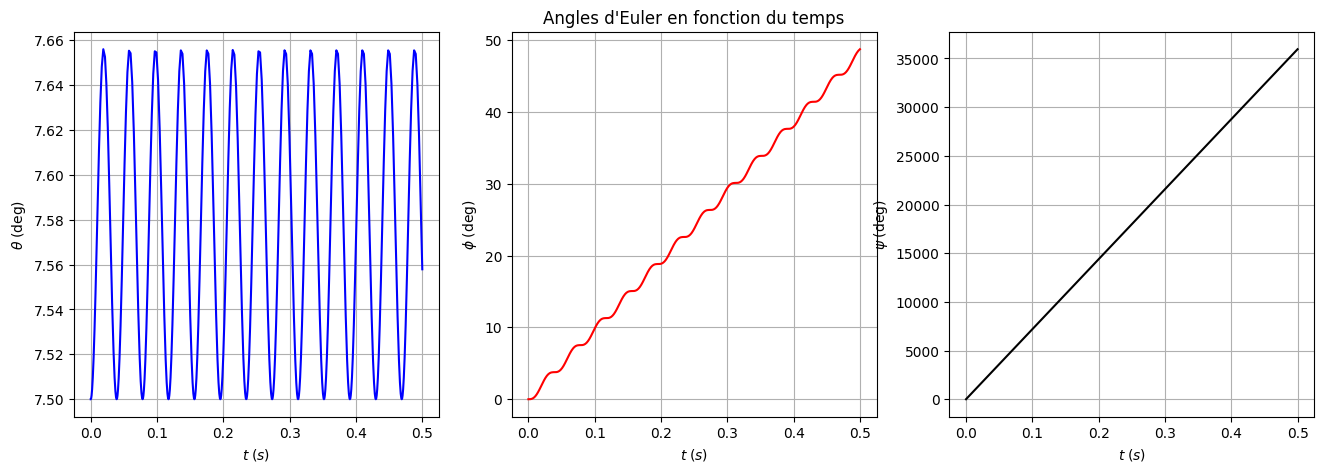

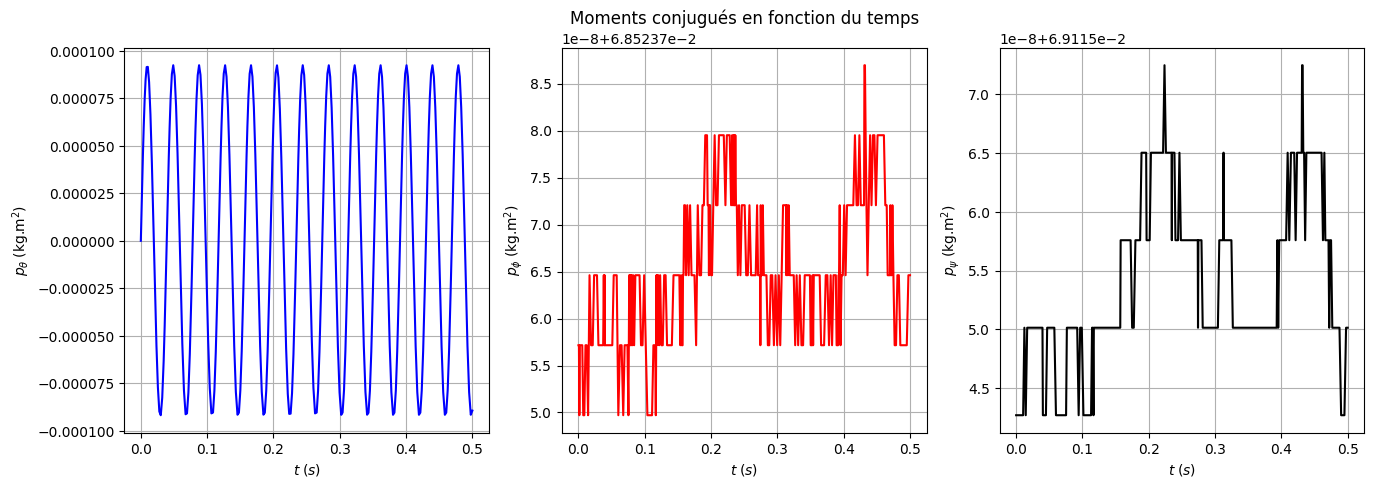

In [50]:
tspan = (0., 0.5)

t, the, the_d, phi, phi_d, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='Free')


p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

Plot_Gyro_Angles(t, the, phi, psi)

#Plot_Gyro_Speed_Angles(t, the_d, phi_d, psi_d)

Plot_Gyro_Momentum(t, p_the, p_phi, p_psi)



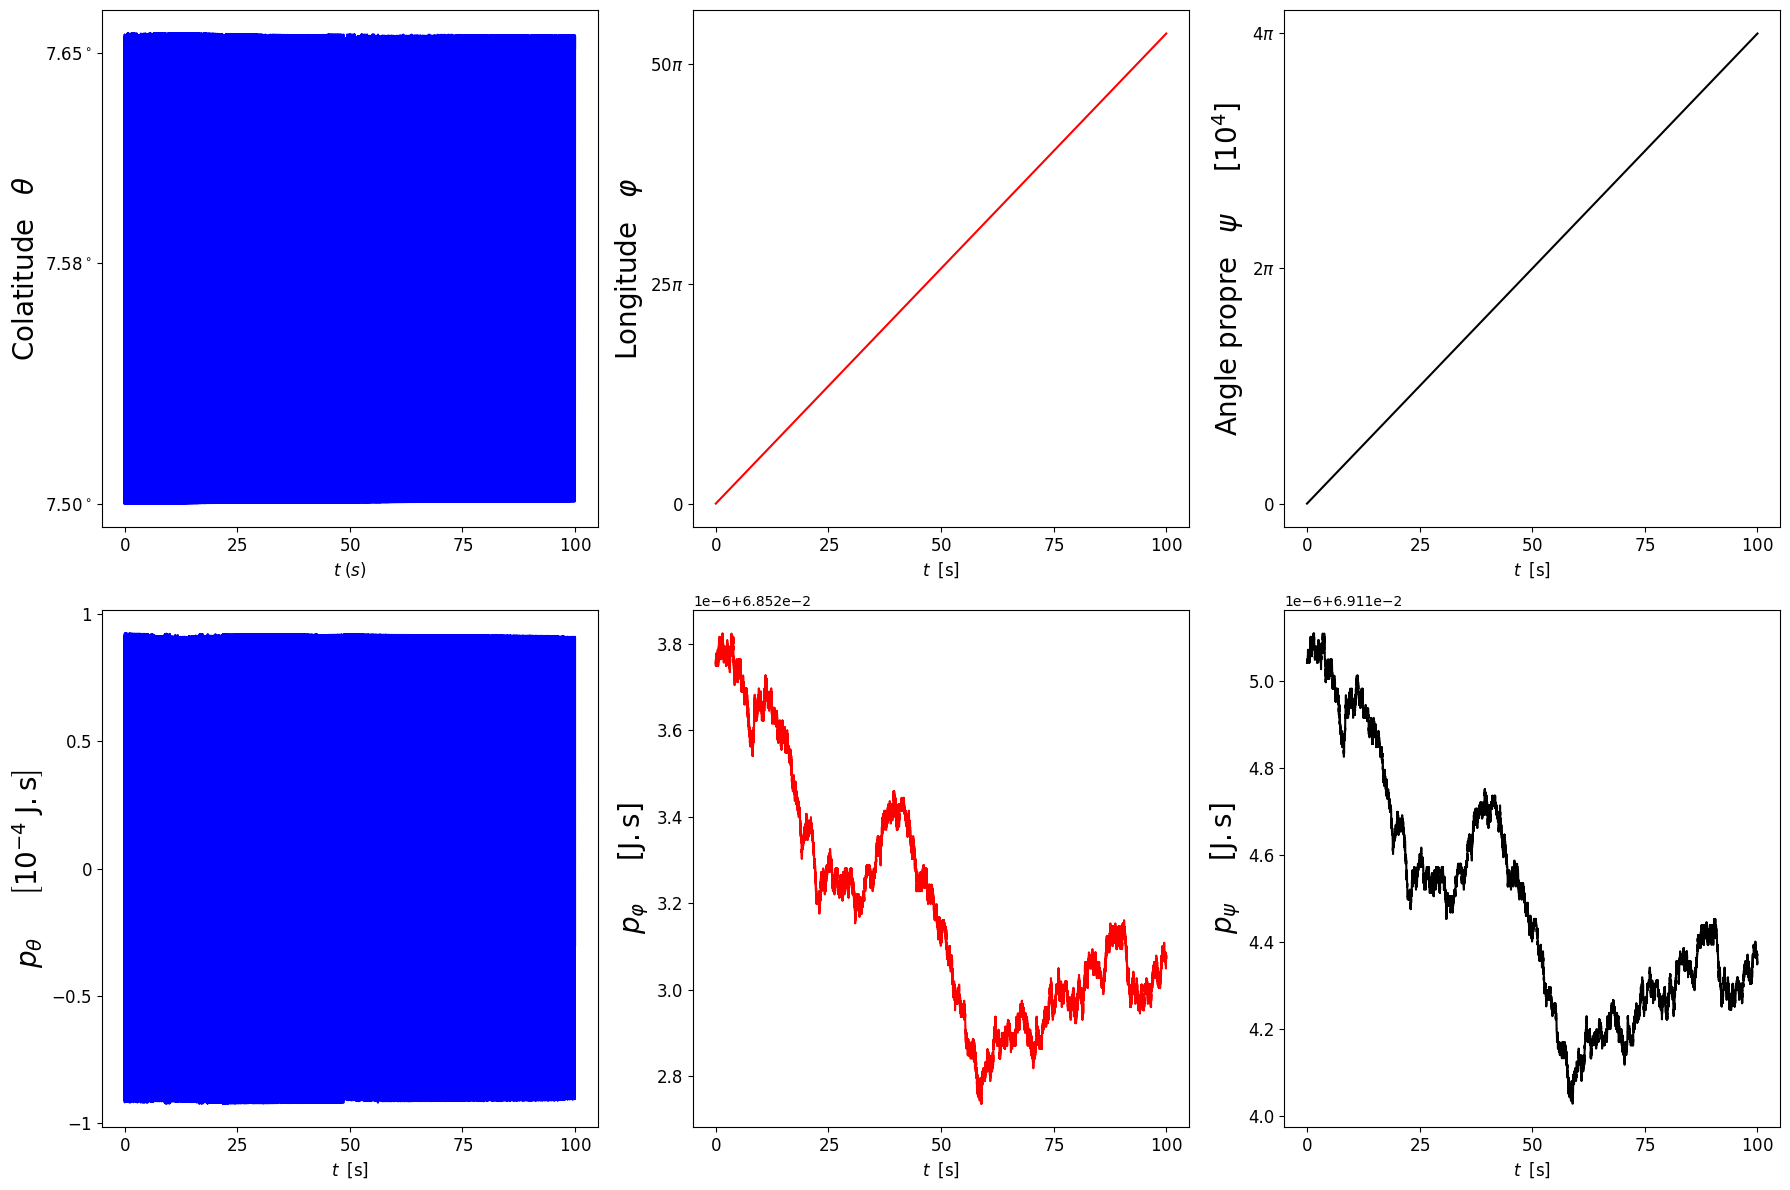

In [4]:
plt.figure(figsize=[18, 12])

plt.subplot(2, 3, 1)
plt.plot(t, the * 180 / np.pi, 'b')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.ylabel(r'Colatitude $\; \; \theta$', fontsize=20)
plt.xlabel(r'$t \;(s)$', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$0$', r'$25$', r'$50$', r'$75$', r'$100$'], fontsize=12)
plt.yticks([180 /24, 7.58, 7.65], [r'$7.50^\circ$', r'$7.58^\circ$', r'$7.65^\circ$'], fontsize=12)

plt.subplot(2, 3, 2)
#plt.title(r"Angles d'Euler en fonction du temps")
plt.plot(t, phi, 'r')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$0$', r'$25$', r'$50$', r'$75$', r'$100$'], fontsize=12)
plt.ylabel(r'Longitude $\; \; \varphi$', fontsize=20)
plt.yticks([0, 25*np.pi, 50*np.pi], [r'$0$', r'$25\pi$', r'$50\pi$'], fontsize=12)

plt.subplot(2, 3, 3)
plt.plot(t, psi, 'k')
plt.ylabel(r'Angle propre $\; \; \psi \quad \; \; \left[ 10^{4} \right]$', fontsize=20)
plt.yticks([0, 20000*np.pi, 40000*np.pi], [r'$0$', r'$2 \pi$', r'$4 \pi$'], fontsize=12)
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$0$', r'$25$', r'$50$', r'$75$', r'$100$'], fontsize=12)



plt.subplot(2, 3, 4)
plt.plot(t, p_the * 1e4, 'b')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.ylabel(r'$p_\theta \quad \; \; \left[ 10^{-4} \; \mathrm{J.s} \right]$', fontsize=20)
plt.xticks([0, 25, 50, 75, 100], [r'$0$', r'$25$', r'$50$', r'$75$', r'$100$'], fontsize=12)
plt.yticks([1, -1, 0, 0.5, -0.5], [r'$1$', r'$-1$', r'$0$', r'$0.5$', r'$-0.5$'], fontsize=12)

plt.subplot(2, 3, 5)
#plt.title(r"Angles d'Euler en fonction du temps")
plt.plot(t, p_phi, 'r')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$0$', r'$25$', r'$50$', r'$75$', r'$100$'], fontsize=12)
#plt.xticks([0, 50, 100], [r'$0$', r'$50$', r'$100$'])
plt.ylabel(r'$p_\varphi \quad \; \; \left[ \mathrm{J.s} \right]$', fontsize=20)
plt.yticks(fontsize=12)
#plt.yticks([0, 25*np.pi, 50*np.pi], [r'$0$', r'$25\pi$', r'$50\pi$'], fontsize=8)


plt.subplot(2, 3, 6)
#plt.title(r"Angles d'Euler en fonction du temps")
plt.plot(t, p_psi, 'k')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.xticks([0, 25, 50, 75, 100], [r'$0$', r'$25$', r'$50$', r'$75$', r'$100$'], fontsize=12)
plt.ylabel(r'$p_\psi \quad \; \; \left[ \mathrm{J.s} \right]$', fontsize=20)
#plt.yticks([0, 25*np.pi, 50*np.pi], [r'$0$', r'$25\pi$', r'$50\pi$'], fontsize=8)
plt.yticks(fontsize=12)


plt.tight_layout()

plt.savefig('Figures/MvtLibre/FirstFreeExample.png')

plt.show()




In [5]:
### Pour visualiser la trajectoire

#Get_Path(t, the, phi, psi)

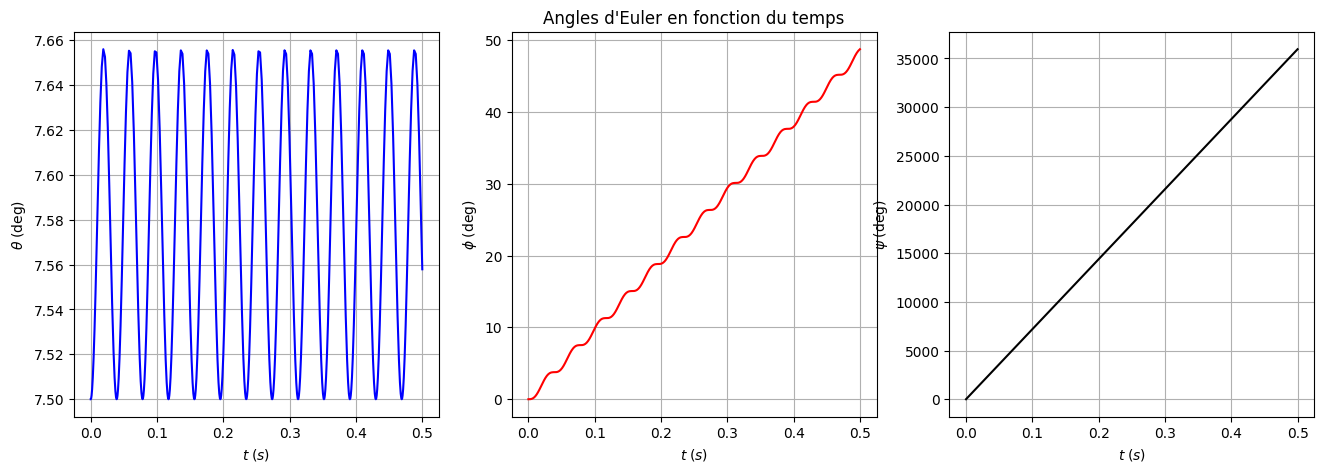

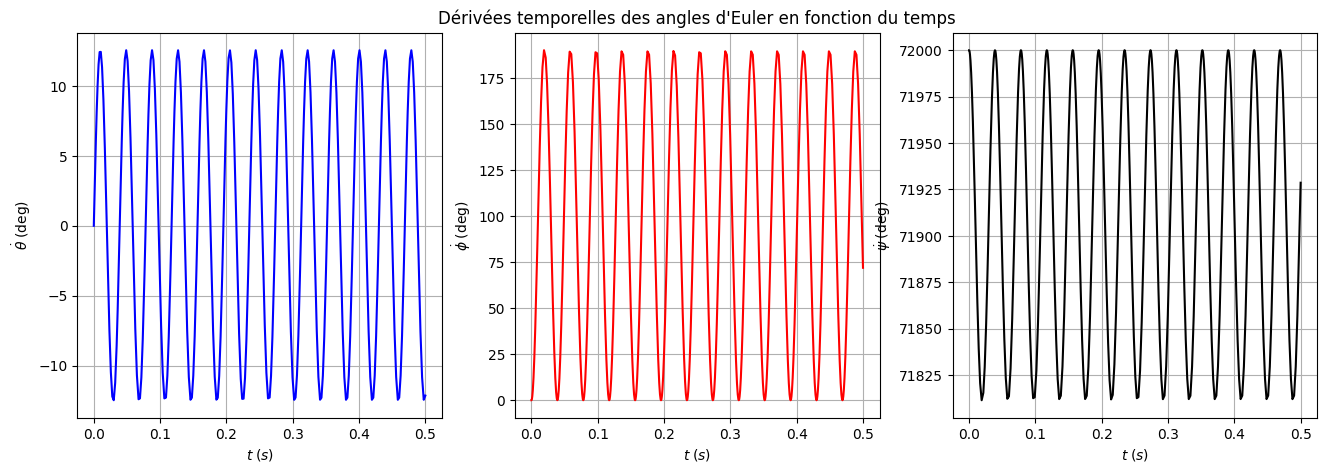

In [6]:
CI = [np.pi / 24, 0, 0, 0, 0, 2 * np.pi * 200]

tspan = (0., 0.5)

t_perfect, the_perfect, the_d, phi_perfect, phi_d_perfect, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='Free')


Plot_Gyro_Angles(t_perfect, the_perfect, phi_perfect, psi)

Plot_Gyro_Speed_Angles(t_perfect, the_d, phi_d_perfect, psi_d)



### II.2 Résolution numérique des équations du mouvement - cas $ \; \dot{\varphi}(t=0) < 0$ :

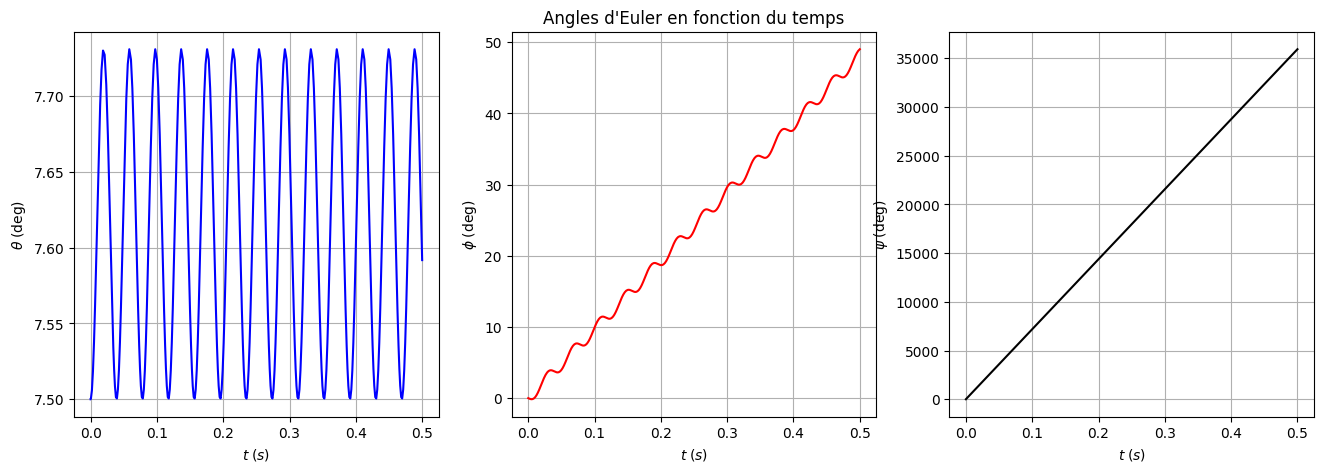

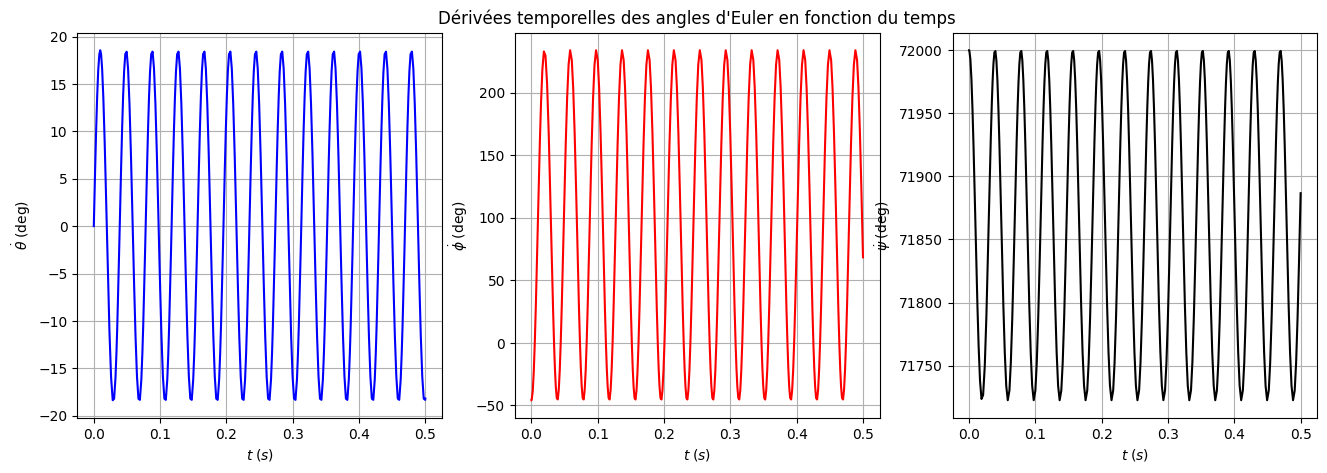

In [7]:
CI = [ np.pi /24, 0, 0, -0.8, 0, 2 * np.pi * 200]

tspan = (0., 0.5)

t_reb, the_reb, the_d, phi_reb, phi_d_reb, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='Free')

Plot_Gyro_Angles(t_reb, the_reb, phi_reb, psi)

Plot_Gyro_Speed_Angles(t_reb, the_d, phi_d_reb, psi_d)

### II.3 Résolution numérique des équations du mouvement - cas $ \; \dot{\varphi}(t=0) = \Omega_L$ :

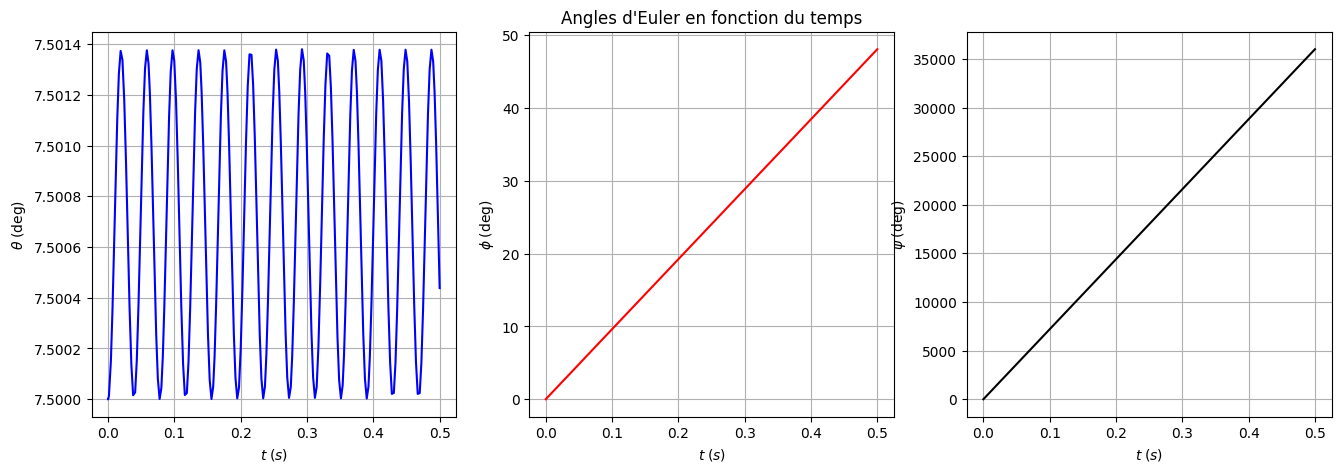

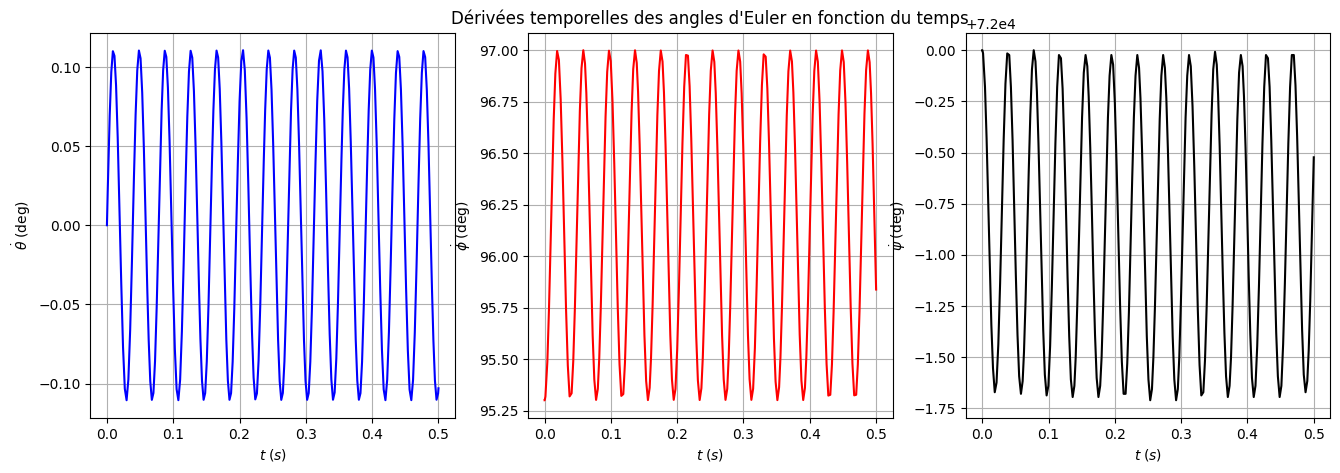

In [8]:
CI = [np.pi / 24, 0, 0, omega_L_th, 0, 2 * np.pi * 200]

tspan = (0., 0.5)

t_boucl, the_boucl, the_d, phi_boucl, phi_d_boucl, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='Free')

Plot_Gyro_Angles(t_boucl, the_boucl, phi_boucl, psi)

Plot_Gyro_Speed_Angles(t_boucl, the_d, phi_d_boucl, psi_d)


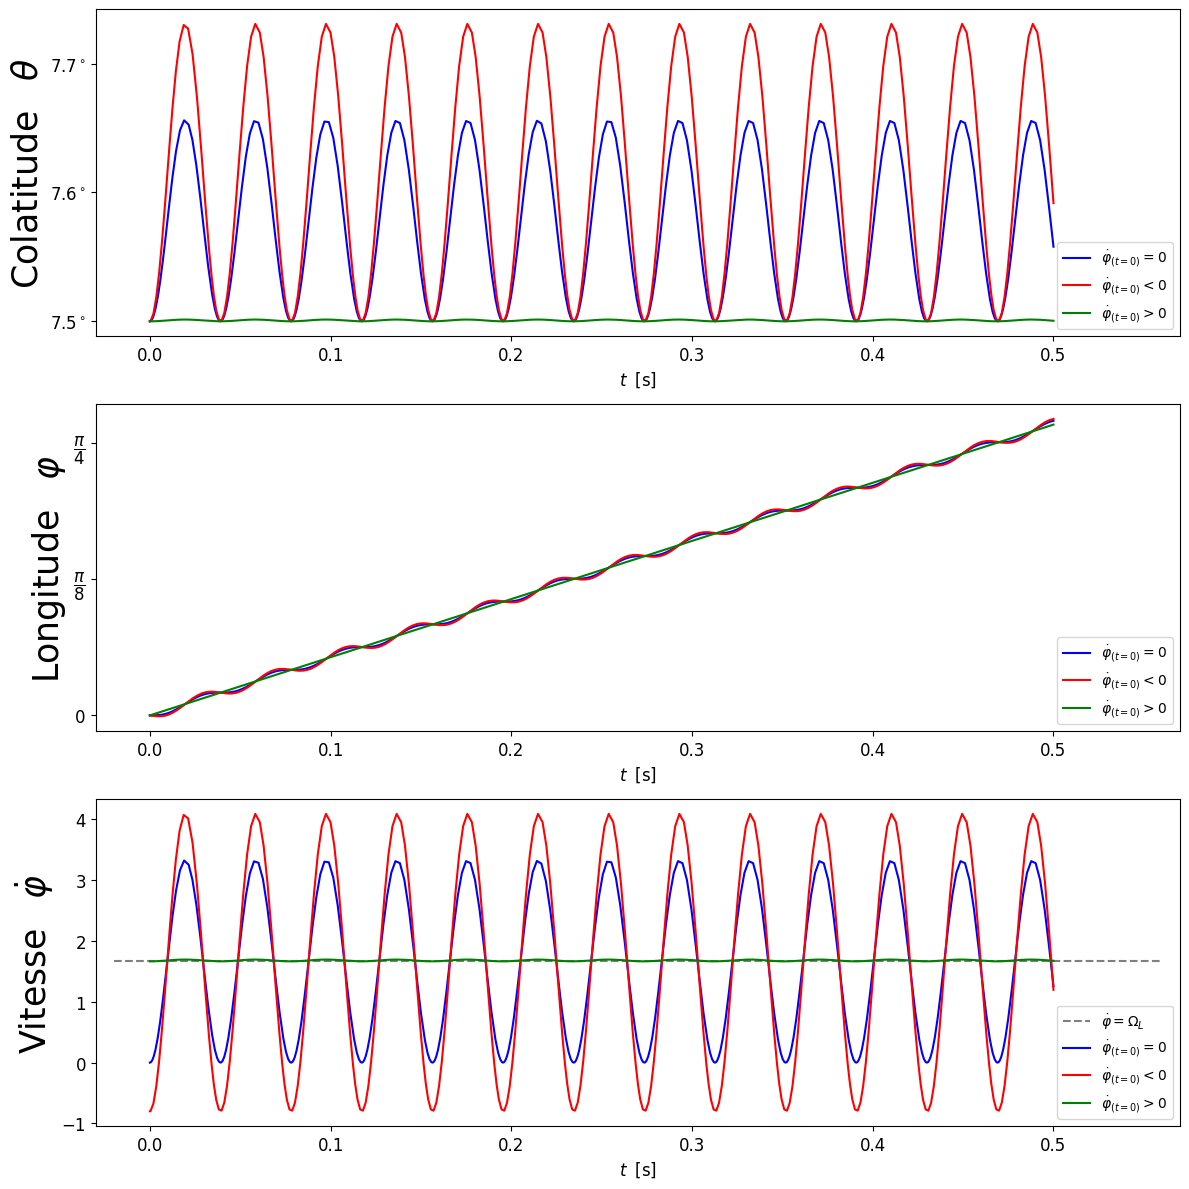

In [9]:
plt.figure(figsize=[12, 12])

plt.subplot(3, 1, 1)
plt.plot(t_perfect, the_perfect * 180 / np.pi, 'b', label=r'$\dot{\varphi}_{(t=0)} = 0$')
plt.plot(t_reb, the_reb * 180 / np.pi, 'r', label=r'$\dot{\varphi}_{(t=0)} < 0$')
plt.plot(t_boucl, the_boucl * 180 / np.pi, 'g', label=r'$\dot{\varphi}_{(t=0)} > 0$')
plt.yticks([7.5, 7.6, 7.7], [r'$7.5^\circ$', r'$7.6^\circ$', r'$7.7^\circ$'], fontsize=12)
plt.ylabel(r'Colatitude $\; \; \theta$', fontsize=25)
plt.xticks(fontsize=12)
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.legend(loc = 'lower right')

plt.xlim([-0.03, 0.57])


plt.subplot(3, 1, 2)
plt.plot(t_perfect, phi_perfect, 'b', label=r'$\dot{\varphi}_{(t=0)} = 0$')
plt.plot(t_reb, phi_reb, 'r', label=r'$\dot{\varphi}_{(t=0)} < 0$')
plt.plot(t_boucl, phi_boucl, 'g', label=r'$\dot{\varphi}_{(t=0)} > 0$')
plt.ylabel(r'Longitude $\; \; \varphi$', fontsize=25)
plt.xticks(fontsize=12)
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.yticks([0, np.pi / 8, np.pi / 4], [r'$0$', r'$\dfrac{\pi}{8}$', r'$\dfrac{\pi}{4}$'], fontsize=12)
plt.legend(loc = 'lower right')

plt.xlim([-0.03, 0.57])


plt.subplot(3, 1, 3)
plt.plot([-0.02, 0.56], [omega_L_th] * 2, 'k--', label=r'$\dot{\varphi} = \Omega_L$', alpha=0.5)

plt.plot(t_perfect, phi_d_perfect, 'b', label=r'$\dot{\varphi}_{(t=0)} = 0$')
plt.plot(t_reb, phi_d_reb, 'r', label=r'$\dot{\varphi}_{(t=0)} < 0$')
plt.plot(t_boucl, phi_d_boucl, 'g', label=r'$\dot{\varphi}_{(t=0)} > 0$')
plt.ylabel(r'Vitesse $\; \; \dot{\varphi}$', fontsize=25)
plt.xticks(fontsize=12)
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.yticks(fontsize=12)

plt.xlim([-0.03, 0.57])

plt.legend(loc = 'lower right')

plt.tight_layout()

plt.savefig('Figures/MvtLibre/RegimesNutation.png')


plt.show()


### II.4 Expression de la fréquence de Larmor $\omega_L$ :

### II.5 Termes de l'Hamiltonien :



In [10]:
g = 9.81           # m/s^2
m = 0.375          # kg
J3 = 0.000055      # kg.m^2
J1 = 0.000055      # kg.m^2
h = 31.25 * 1e-3   # m
x0 =  0.1          # m
omega_exc = 1.663      # Hertz
Phi = np.pi

params = [g, m, h, J1, J3 , x0, Phi, omega_exc]
CI = [np.pi / 24, 0, 0, 0, 0, 2 * np.pi * 200]

omega_L_th, omega_R_th = Compute_Carac_Pulsations(params, CI)

omega_exc = omega_L_th

CI = [np.pi / 24, 0, 0, 0, 0, 2 * np.pi * 200]

tspan = (0., 0.5)

t, the, the_d, phi, phi_d, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='Free')

p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)



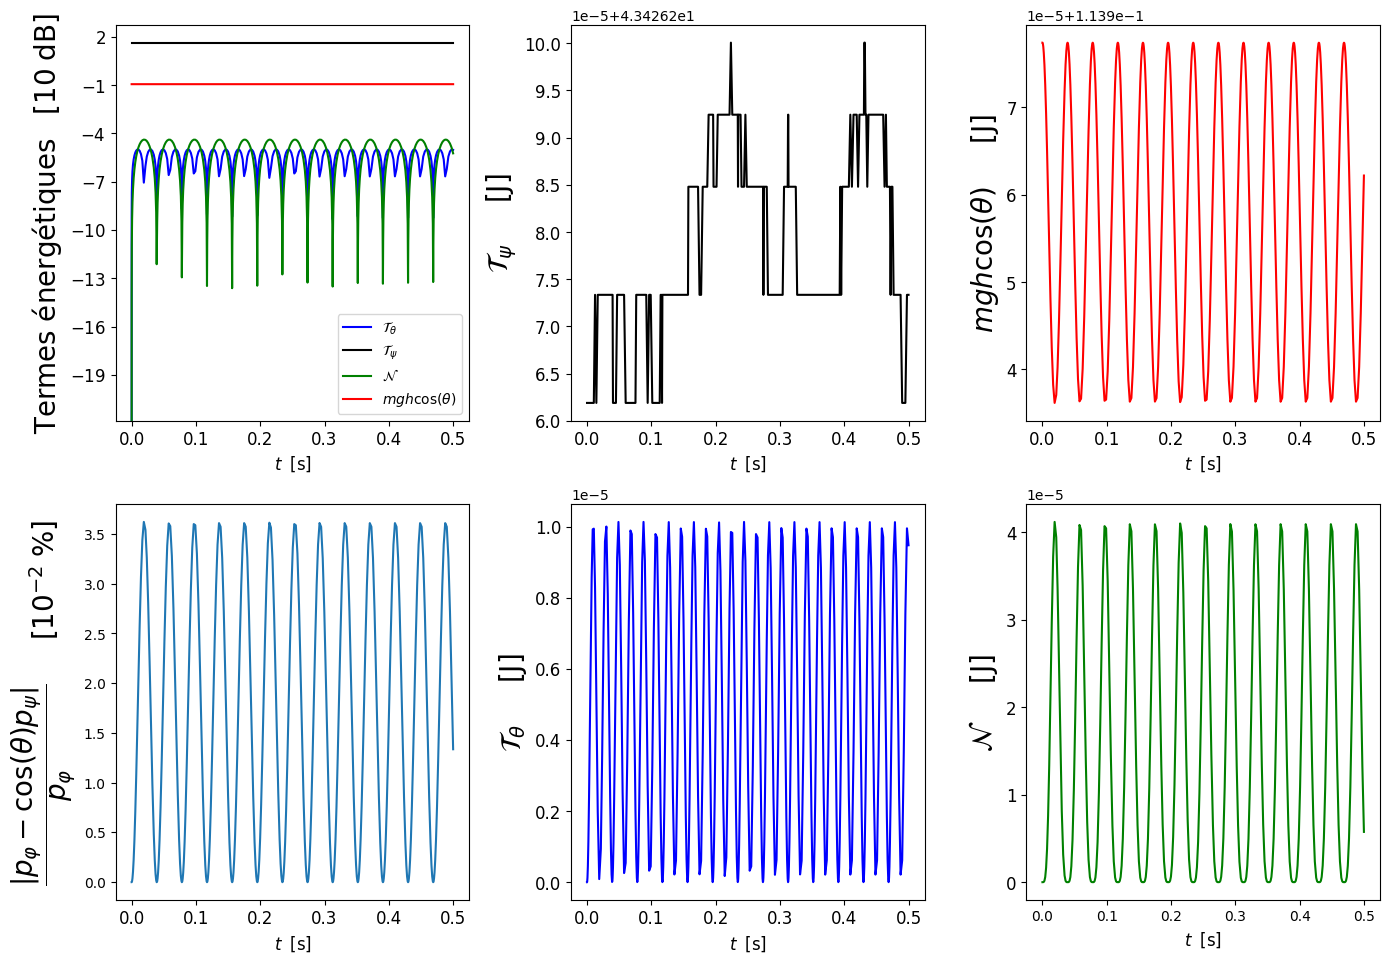

In [11]:
Ec_theta, Ec_psi, Nutation, Epp = Hamiltonian_Terms(t, the, phi, psi, the_d, phi_d, psi_d, params, forcing='Free')

plt.figure(figsize=[14, 14])

plt.subplot(3, 3, 1)
plt.plot(t, Ec_theta, label=r'$ \mathcal{T}_\theta$', color='b')
plt.plot(t, Ec_psi, label=r'$ \mathcal{T}_\psi$', color='k')
plt.plot(t, Nutation, label=r'$ \mathcal{N}$', color='g')
plt.plot(t, Epp, label=r'$ mgh\cos(\theta)$', color='r')
plt.yscale('log')
#plt.ylim([10e-17, 500])
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)

plt.yticks([1e2, 1e-1, 1e-4, 1e-7, 1e-10, 1e-13, 1e-16, 1e-19], 
           [r'$2$', r'$-1$', r'$-4$', r'$-7$', r'$-10$', r'$-13$', r'$-16$', r'$-19$'], fontsize=12)
plt.ylabel(r'Termes énergétiques $ \;\; \left [ 10 \; \mathrm{dB}\right]$', fontsize=20)
plt.xticks(fontsize=12)

plt.legend()


plt.subplot(3, 3, 4)
#plt.plot(t, Ec_theta, label=r'$ \mathcal{T}_\theta$')
#plt.plot(t, Nutation, label=r'$ \mathcal{N}$')
plt.plot(t, 1e4 * np.abs(p_phi - p_psi * np.cos(the)) / p_phi)
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.xticks(fontsize=12)
#plt.ylabel(r'$\vert p_\varphi - \cos(\theta)p_\psi \vert / p_\varphi \;\; \left [ 10^{-2} \%\right]$', fontsize=20)
plt.ylabel(r'$\dfrac{\vert p_\varphi - \cos(\theta) p_\psi \vert}{p_\varphi} \;\; \quad \left [ 10^{-2}\; \%\right]$', fontsize=20)



plt.subplot(3, 3, 2)
plt.plot(t, Ec_psi, label=r'$ \mathcal{T}_\psi$', color='k')
plt.xticks(fontsize=12)
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.ylabel(r'$\mathcal{T}_\psi \quad \; \; \left[ \mathrm{J} \right]$', fontsize=20)
plt.yticks(fontsize=12)


plt.subplot(3, 3, 3)
plt.plot(t, Epp, label=r'$ mgh\cos(\theta)$', color='r')
plt.xticks(fontsize=12)
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.ylabel(r'$mgh\cos(\theta) \quad \; \; \left[ \mathrm{J} \right]$', fontsize=20)
plt.yticks(fontsize=12)


plt.subplot(3, 3, 5)
plt.plot(t, Ec_theta, color='b')
plt.xticks(fontsize=12)
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel(r'$\mathcal{T}_\theta \quad \; \; \left[ \mathrm{J} \right]$', fontsize=20)

plt.subplot(3, 3, 6)
plt.plot(t, Nutation, color='g')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel(r'$\mathcal{N} \quad \; \; \left[ \mathrm{J} \right]$', fontsize=20)


plt.tight_layout()

plt.savefig('Figures/MvtLibre/EnergiesFree.png')



plt.show()



### II.7 Première conclusion :

*In-fine*, nous avons retrouvé numériquement la totalité des résultats théoriques établis, en particulier :

* Expression de la fréquence de Larmor $\omega_L = \frac{mgh}{p_\psi}$
* Constante des moments conjugués $p_\psi$ et $p_\varphi$ aucours du temps.
* Les 3 régimes de Nutation en fonction des conditions initiales.
* Conservation de l'énergie, comparaison des termes d'énergie : $\mathcal{T}_\psi \gg mgh\cos(\theta) \gg \mathcal{N} \gg \mathcal{T}_\theta$.
* Validation de l'approximation gyroscopique et négligeabilité de la Nutation $\; \mathcal{T}_\theta \approx 0, \quad \mathcal{N}\approx 0$

$\;$


Notre implémentation numérique est validée pour le régime libre, passons maintenant au régime forcé et vérifions la correspondance entre les résultats numériques et théoriques.


$\;$


$\;$



--------------


$\;$

$\;$

# III- Mouvement Forcé :


### III.1 Résolution numérique - forçage $X$ :



In [12]:
# Affichage des fréquences caractéristiques du mouvement

g = 9.81           # m/s^2
m = 0.375          # kg
J3 = 0.000055      # kg.m^2
J1 = 0.000055      # kg.m^2
h = 31.25 * 1e-3   # m
x0 =  0.1         # m
Phi = np.pi

omega_L_th, omega_R_th = Compute_Carac_Pulsations(params, CI)

omega_exc = omega_L_th      # PULSATION DE LARMOR - Résonance

params = [g, m, h, J1, J3 , x0, Phi, omega_exc]
CI = [np.pi / 12, 0, 0, 0, 0, 2 * np.pi * 200]

# Affiche les paramètres caractiéristiques du régime forcé
Gyro_Carac_Values(params, CI)

Larmor Pulsation (th) :               +1.663
Larmor Frequency (th) :               +0.265
Larmor Period (th) :               +3.777 

Rabi Pulsation (th) :               +0.023
Rabi Period (th) :             +267.883
Temps de montée (th) :             +133.942 

Rapport des pulsations Larmor/Rabi :              +70.916 

Rapport Approx Gyroscopique :          +14_912.892 



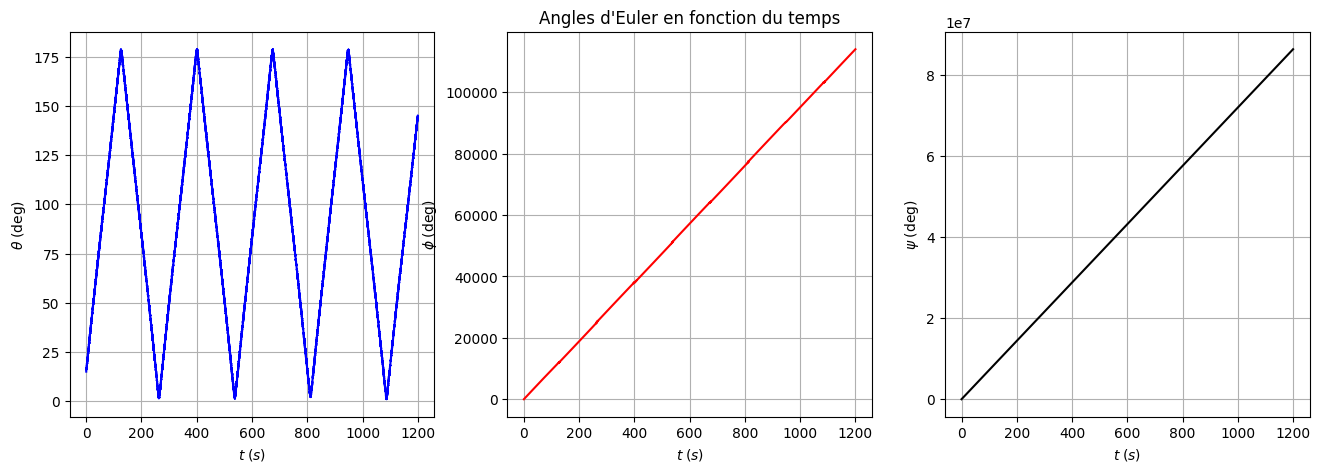

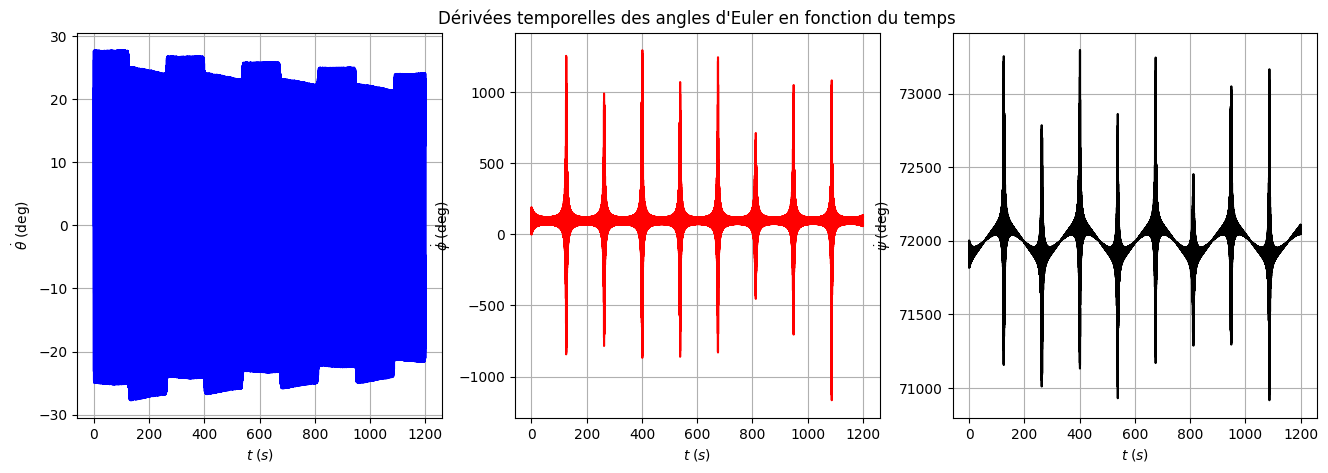

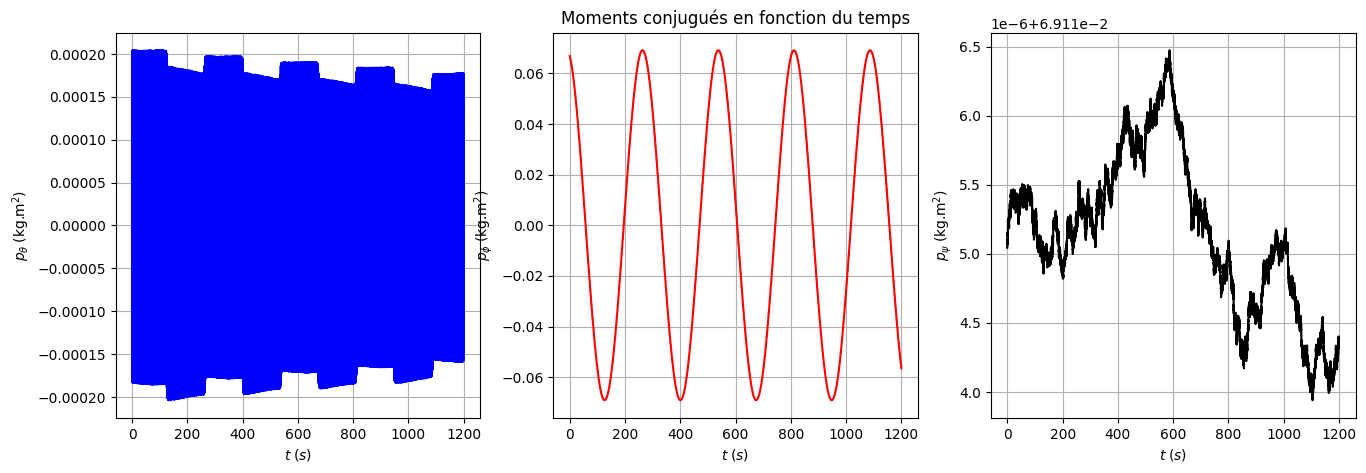

In [13]:
tspan = (0., 1200.)

t, the, the_d, phi, phi_d, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='X', precision='HIGH')


p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

Plot_Gyro_Angles(t, the, phi, psi)

Plot_Gyro_Speed_Angles(t, the_d, phi_d, psi_d)

Plot_Gyro_Momentum(t, p_the, p_phi, p_psi)

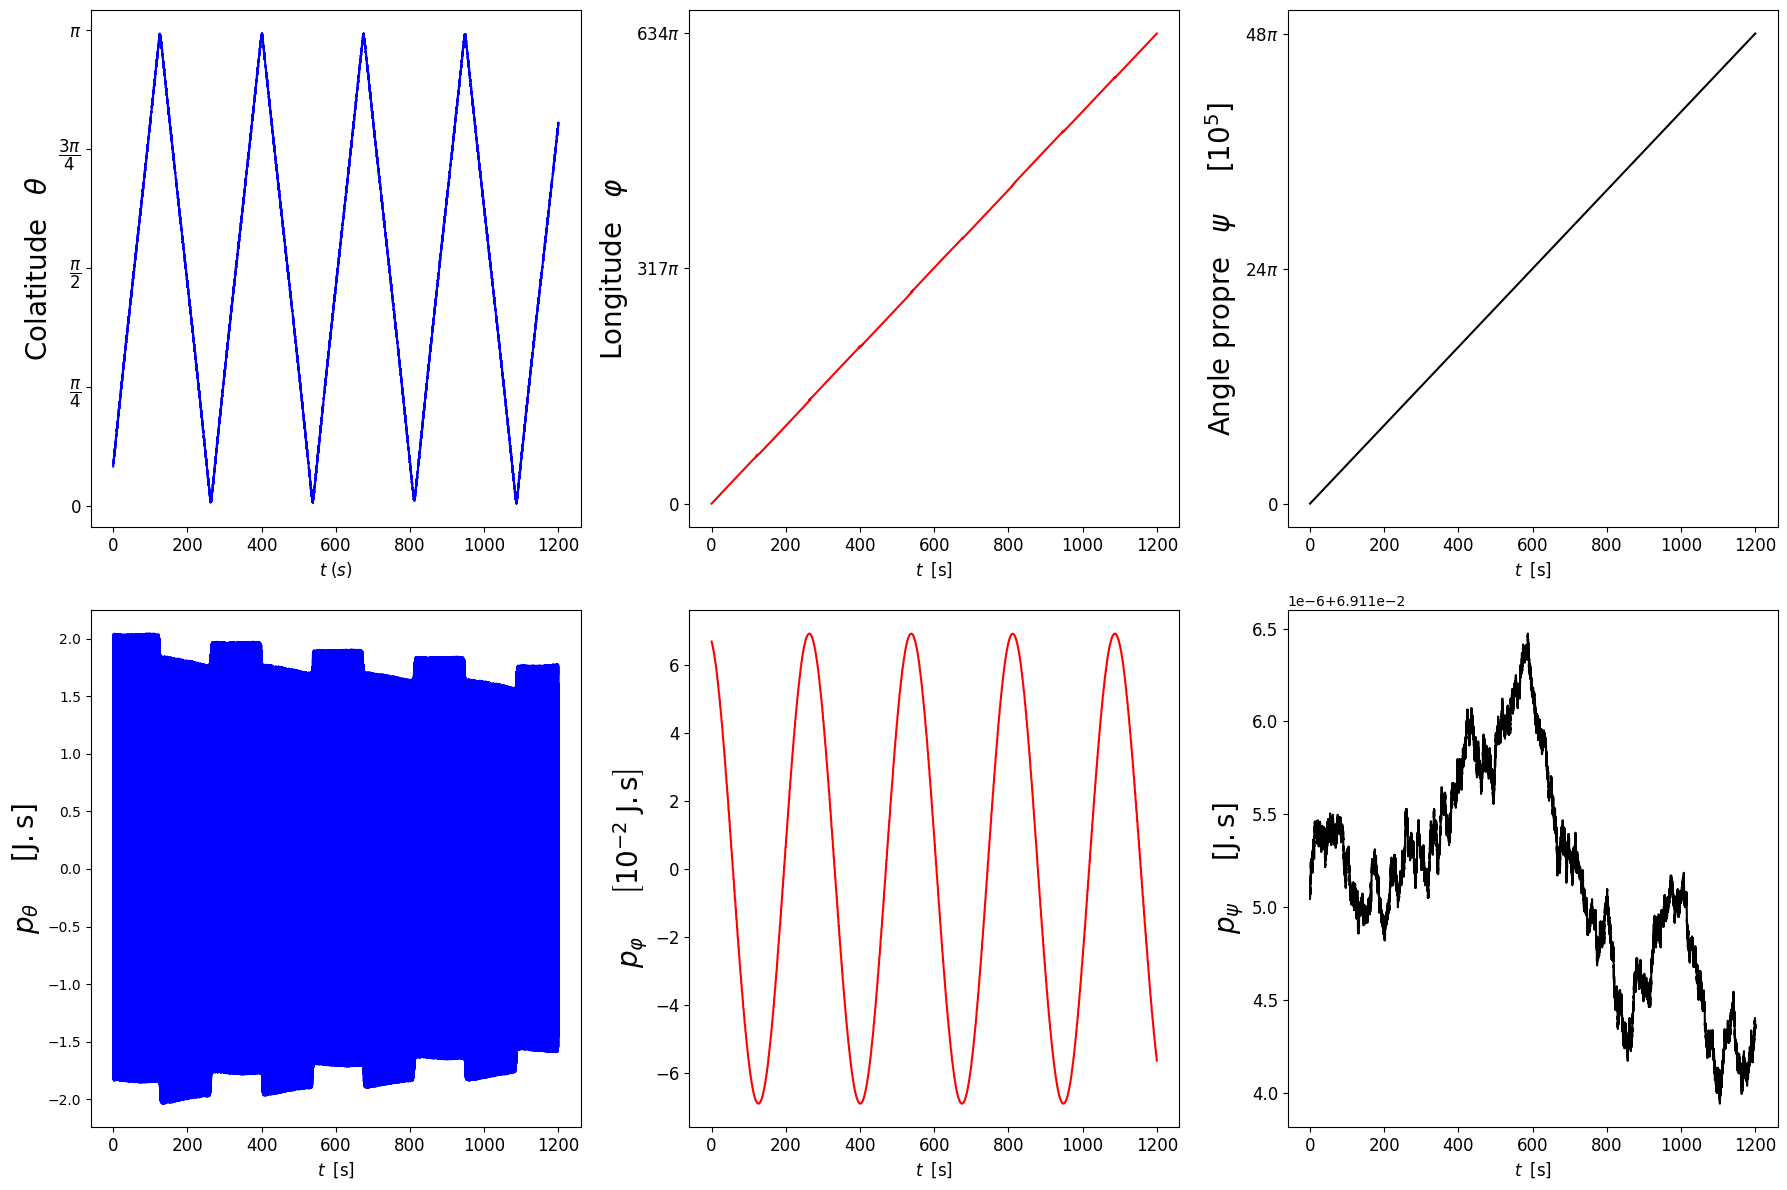

In [14]:
plt.figure(figsize=[18, 12])

plt.subplot(2, 3, 1)
plt.plot(t, the , 'b')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.ylabel(r'Colatitude $\; \; \theta$', fontsize=20)
plt.xlabel(r'$t \;(s)$', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0, np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi], 
           [r'$0$', r'$\dfrac{\pi}{4}$', r'$\dfrac{\pi}{2}$', r'$\dfrac{3\pi}{4}$', r'$\pi$'], fontsize=12)

plt.subplot(2, 3, 2)
#plt.title(r"Angles d'Euler en fonction du temps")
plt.plot(t, phi, 'r')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel(r'Longitude $\; \; \varphi$', fontsize=20)
plt.yticks([0, 317*np.pi, 634*np.pi], [r'$0$', r'$317\pi$', r'$634\pi$'], fontsize=12)

plt.subplot(2, 3, 3)
plt.plot(t, psi, 'k')
plt.ylabel(r'Angle propre $\; \; \psi \quad \; \; \left[ 10^{5} \right]$', fontsize=20)
plt.yticks([0, 24 *1e4 *np.pi, 48 * 1e4* np.pi], [r'$0$', r'$24 \pi$', r'$48 \pi$'], fontsize=12)
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.xticks(fontsize=12)



plt.subplot(2, 3, 4)
plt.plot(t, p_the * 1e4, 'b')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.ylabel(r'$p_\theta \quad \; \; \left[ \mathrm{J.s} \right]$', fontsize=20)
plt.xticks(fontsize=12)
#plt.yticks([1, -1, 0, 0.5, -0.5], [r'$1$', r'$-1$', r'$0$', r'$0.5$', r'$-0.5$'], fontsize=12)

plt.subplot(2, 3, 5)
#plt.title(r"Angles d'Euler en fonction du temps")
plt.plot(t, p_phi * 1e2, 'r')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.xticks(fontsize=12)
#plt.xticks([0, 50, 100], [r'$0$', r'$50$', r'$100$'])
plt.ylabel(r'$p_\varphi \quad \; \; \left[10^{-2} \; \mathrm{J.s} \right]$', fontsize=20)
plt.yticks(fontsize=12)
#plt.yticks([0, 25*np.pi, 50*np.pi], [r'$0$', r'$25\pi$', r'$50\pi$'], fontsize=8)


plt.subplot(2, 3, 6)
#plt.title(r"Angles d'Euler en fonction du temps")
plt.plot(t, p_psi, 'k')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel(r'$p_\psi \quad \; \; \left[ \mathrm{J.s} \right]$', fontsize=20)
#plt.yticks([0, 25*np.pi, 50*np.pi], [r'$0$', r'$25\pi$', r'$50\pi$'], fontsize=8)
plt.yticks(fontsize=12)


plt.tight_layout()

plt.savefig('Figures/MvtForce/FirstForcedExample.png')

plt.show()


$\;$ 

On peux faire plusieurs observations :

$\;$


* On conserve la constance de $p_\psi$ (fluctuations relatives de l'ordre de $10^{-4}$ dans la limite de la précision numérique), et on perd la constance de $p_\varphi$ comme attendu.

Comme nous l'avons vu dans le rapport, en vertu des équations d'Hamilton :


$$ \dot{p}_\varphi = -\dfrac{\partial \mathcal{H}_X}{\partial \varphi} = mhx_0 \omega^2 \cos(\omega t + \Phi) \cos(\varphi) \sin(\theta) = \dfrac{1}{2} mhx_0 \omega^2\left[ \cos(\omega t + \Phi - \varphi) + \cos(\omega t + \Phi + \varphi)  \right] \sin(\theta)  $$


En moyennant sur une période de $\theta$ notée $\dfrac{2\pi}{\Omega_R^X} \gg \dfrac{2\pi}{\omega_L}$ et en se plaçant au voisinage de la résonance $\omega \approx \omega_L$ $ \quad \Longrightarrow \quad $ $ \varphi \approx \omega_L \cdot t, \quad \theta \approx \Omega_R^X \cdot t + \theta_0$ on aura :

$$ \left<  \dot{p}_\varphi \right> \approx \dfrac{1}{2} mhx_0 \omega_L^2 \cos(\Phi) \sin(\theta) \approx \dfrac{1}{2} mhx_0 \omega_L^2 \cos(\Phi) \sin\left(\Omega_R^X \cdot t + \theta_0 \right)  $$

Soit :

$$ \left<  p_\varphi \right> \underset{\delta \to 0}{\approx} -  \dfrac{mhx_0 \omega_L^2}{2 \Omega_R^X} \cos(\Phi) \cos(\theta)   $$


$\;$

Pulsation de Larmor théorique = 1.6633274059639487
Pulsation de Larmor numérique = 1.66061 +/- 1e-05


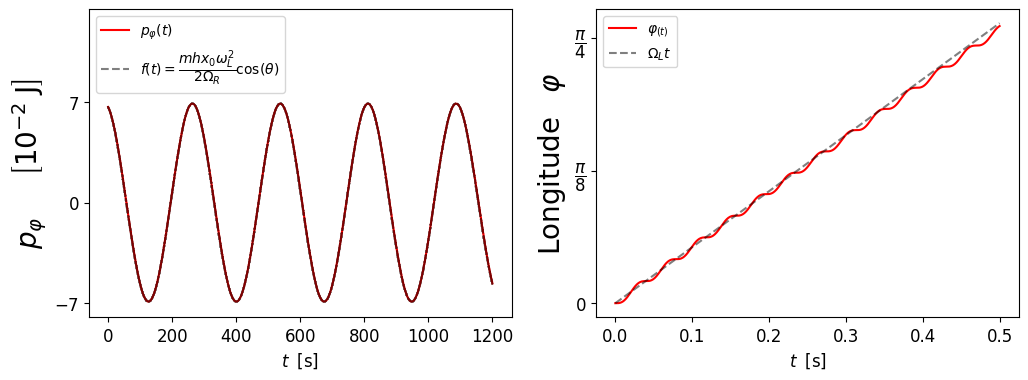

In [15]:
p_phi_th, label_th = Verif_momentum_varphi_forced(t, the, p_phi, omega_R_th, params, forcing='X')

plt.figure(figsize=[12,4])

plt.subplot(1, 2, 1)
plt.plot(t, p_phi * 1e2, 'r', label=r'$p_\varphi(t)$')
plt.plot(t, p_phi_th * 1e2, 'k--', label=label_th, alpha=0.5)
plt.legend()
plt.ylabel(r'$p_\varphi \quad \; \; \left[ 10^{-2} \; \mathrm{J} \right]$', fontsize=20)
plt.xlabel(r'$t \;\; \left[\mathrm{s} \right]$', fontsize=12)
plt.xticks(fontsize=12)


omega_L_num_X, sigma_X = np.round(Get_Larmor_Freq(t, phi, omega_L_th, full_output='False'), 5)
print('Pulsation de Larmor théorique =', omega_L_th)
print('Pulsation de Larmor numérique =', omega_L_num_X, '+/-', sigma_X)

bool_X_plot = t <= 0.5

plt.ylim([-8, 13.5])
#plt.yticks([-7.5, -5.0, -2.5, 0.0, 2.5, 5.0, 7.5], 
#           [r'$-7.5$', r'$-5.0$', r'$-2.5$', r'$0.0$', r'$2.5$', r'$5.0$', r'$7.5$'], fontsize=12)
plt.yticks([-7, 0, 7], 
           [r'$-7$', r'$0$', r'$7$'], fontsize=12)
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(t[bool_X_plot], phi[bool_X_plot], 'r', label=r'$\varphi_{(t)}$')
plt.plot(t[bool_X_plot], AngleRef(t[bool_X_plot], omega_L_num_X, 0), 'k--', alpha=0.5, label=r'$\Omega_L t$')
plt.xlabel(r'$t \;\; \left[\mathrm{s} \right]$', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0, np.pi / 8, np.pi / 4], 
           [r'$0$', r'$\dfrac{\pi}{8}$', r'$\dfrac{\pi}{4}$'], fontsize=12)
plt.ylabel(r'Longitude $\; \; \varphi$', fontsize=20)

plt.legend(loc='upper left')

plt.savefig('Figures/MvtForce/VerifForced.png')

plt.show()

### III.2 Lissage, stabilité numérique et suppression de la Nutation :




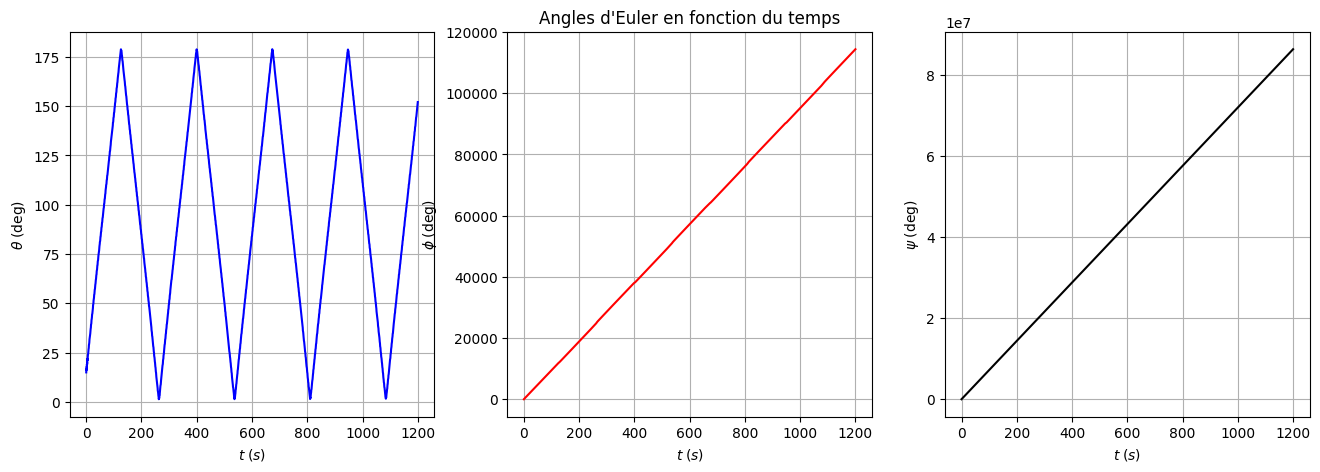

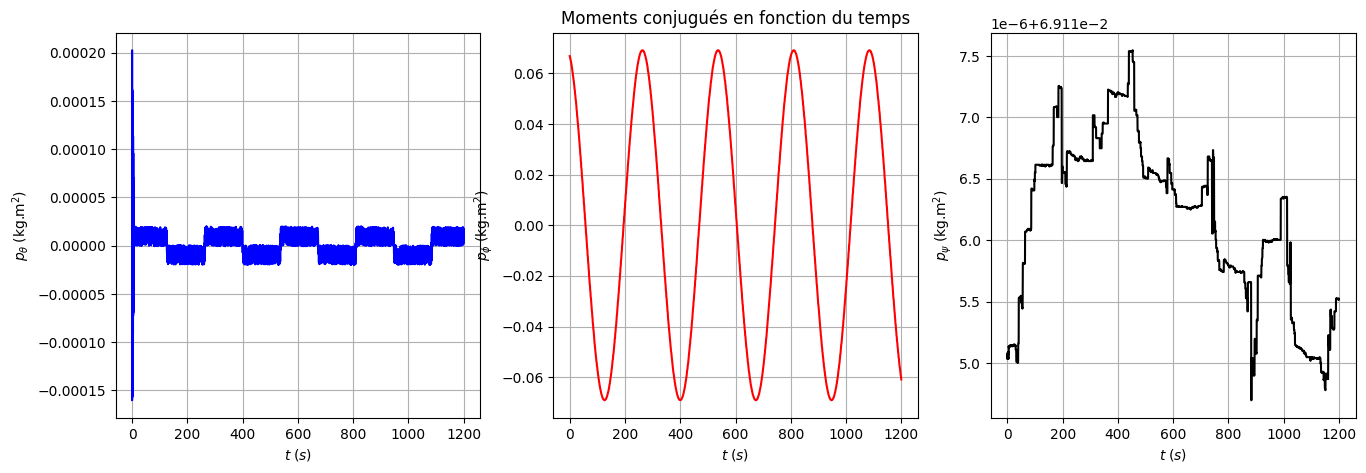

In [16]:
tspan = (0., 1200.)

t, the, the_d, phi, phi_d, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='X', precision='HIGH')


p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

t_lisse, the_lisse, the_d_lisse, phi_lisse, phi_d_lisse, psi_lisse, psi_d_lisse = Gyro_Solver(tspan, CI, params, forcing='X', precision='LOW')


p_the_lisse, p_phi_lisse, p_psi_lisse = Conjugated_Momentums(the_lisse, phi_lisse, 
                                                             psi_lisse, the_d_lisse, phi_d_lisse, psi_d_lisse, params)


Plot_Gyro_Angles(t_lisse, the_lisse, phi_lisse, psi_lisse)

Plot_Gyro_Momentum(t_lisse, p_the_lisse, p_phi_lisse, p_psi_lisse)



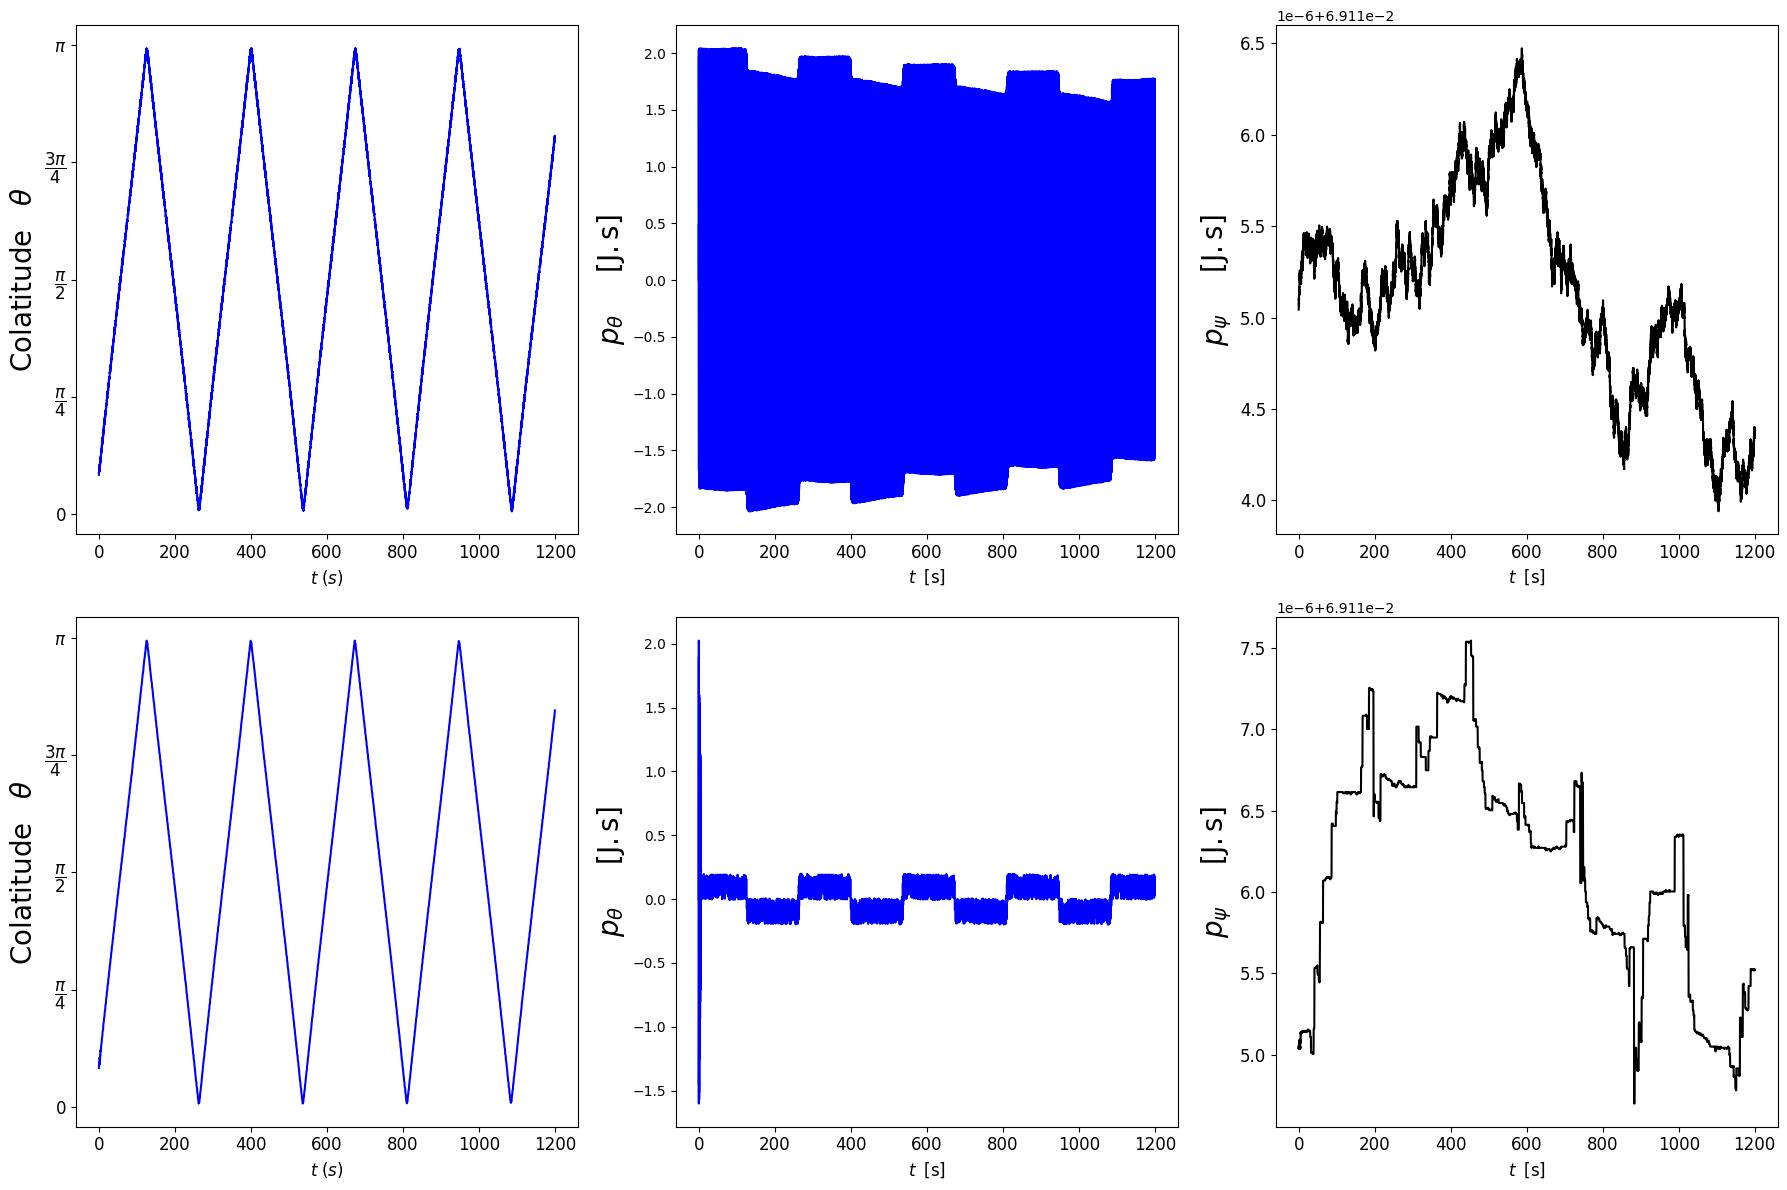

In [17]:
plt.figure(figsize=[18, 12])

plt.subplot(2, 3, 1)
plt.plot(t, the , 'b')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.ylabel(r'Colatitude $\; \; \theta$', fontsize=20)
plt.xlabel(r'$t \;(s)$', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0, np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi], 
           [r'$0$', r'$\dfrac{\pi}{4}$', r'$\dfrac{\pi}{2}$', r'$\dfrac{3\pi}{4}$', r'$\pi$'], fontsize=12)

plt.subplot(2, 3, 2)
plt.plot(t, p_the * 1e4, 'b')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.ylabel(r'$p_\theta \quad \; \; \left[ \mathrm{J.s} \right]$', fontsize=20)
plt.xticks(fontsize=12)
#plt.yticks([1, -1, 0, 0.5, -0.5], [r'$1$', r'$-1$', r'$0$', r'$0.5$', r'$-0.5$'], fontsize=12)

plt.subplot(2, 3, 3)
#plt.title(r"Angles d'Euler en fonction du temps")
plt.plot(t, p_psi, 'k')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel(r'$p_\psi \quad \; \; \left[ \mathrm{J.s} \right]$', fontsize=20)
#plt.yticks([0, 25*np.pi, 50*np.pi], [r'$0$', r'$25\pi$', r'$50\pi$'], fontsize=8)
plt.yticks(fontsize=12)

plt.subplot(2, 3, 4)
plt.plot(t_lisse, the_lisse , 'b')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.ylabel(r'Colatitude $\; \; \theta$', fontsize=20)
plt.xlabel(r'$t \;(s)$', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks([0, np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi], 
           [r'$0$', r'$\dfrac{\pi}{4}$', r'$\dfrac{\pi}{2}$', r'$\dfrac{3\pi}{4}$', r'$\pi$'], fontsize=12)

plt.subplot(2, 3, 5)
plt.plot(t_lisse, p_the_lisse * 1e4, 'b')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.ylabel(r'$p_\theta \quad \; \; \left[ \mathrm{J.s} \right]$', fontsize=20)
plt.xticks(fontsize=12)
#plt.yticks([1, -1, 0, 0.5, -0.5], [r'$1$', r'$-1$', r'$0$', r'$0.5$', r'$-0.5$'], fontsize=12)

plt.subplot(2, 3, 6)
#plt.title(r"Angles d'Euler en fonction du temps")
plt.plot(t_lisse, p_psi_lisse, 'k')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel(r'$p_\psi \quad \; \; \left[ \mathrm{J.s} \right]$', fontsize=20)
#plt.yticks([0, 25*np.pi, 50*np.pi], [r'$0$', r'$25\pi$', r'$50\pi$'], fontsize=8)
plt.yticks(fontsize=12)


plt.tight_layout()

plt.savefig('Figures/MvtForce/CompatSpeedPrecision.png')

plt.show()

$\;$

### III.3 Expression de la fréquence de Rabi à résonance :

À fin de justifier que l'on obtient bel et bien des oscillation de Rabi, il faut vérifier si l'on retrouve numériquement l'expression de la pulsation de Rabi donné par :

$$ \Omega_R^X(\delta = 0) = - \dfrac{1}{2}\cos(\Phi) \dfrac{mh x_0 \omega_L^2}{p_\psi} = -\dfrac{1}{2} \cos(\Phi) \dfrac{x_0 \omega_L^3}{g} $$

Étant donné que l'ensemble des paramètres caractéristiques du Gyroscope sont constantes ou fixées par l'expérience, nous nous attarderons uniquement sur la contribution des paramètres du *Drive* $(\omega, x_0, \Phi)$; autrement dit sur la dépendance de $Omega_R^X$ en fonction de $x_0$ ainsi que l'effet du déphasage $\Phi$ sur le mouvement.


Nous nous plaçons toujours à résonance $\omega = \omega_L$, nous verrons plus loin le dépendance de $\dot{\theta}$ en fonction de la pulsation Drive $\omega$ dans le cas général.

$\;$


##### III.3.a Variation de la fréquence de Rabi avec $x_0$ :

Pour extraire la fréquence de Rabi, on ajuste la fonction $\cos(\theta)$ à une sinusoïde modèle $y_m = y_0\cos(\omega_m t + \Phi_m)$

En effet, grâce à la parité du cosinus, nous n'avons plus à nous soucier du fait que $\theta(t)$ varie en dents de scie plutôt que linéairement en fonction du temps.


$\;$

La cellule ci dessous nous renvoie les paramètres ajustés $(\omega_m, y_0, \Phi_m)$ ainsi que les incertitudes numériques associées (qui sont prises égales au écarts-types donnés par la matrice de covariance estimée).   

$\;$



Paramètres ajustés : [0.02289076 0.99051463 0.25885669]
Incertitudes associées : [9.08427149e-08 3.15600473e-05 6.36096564e-05] 



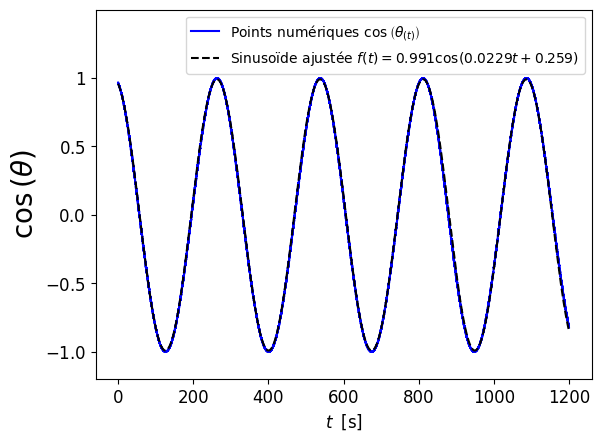

Pulsation Rabi donnée par l'ajustement : 0.02289076 +/- 9e-08
Pulsation Rabi théorique : 0.0234457


In [18]:
params_hint = [omega_R_th, 1, CI[0]]

params_fit, tab_incertitudes = Get_Rabi_Freq(t, the, params_hint, full_output='True')

print("Paramètres ajustés :", params_fit)
print("Incertitudes associées :", tab_incertitudes, '\n')

plt.figure()
plt.plot(t, np.cos(the), 'b', label=r'Points numériques $\cos\left( \theta_{(t)} \right)$')
plt.plot(t, Sinusoide(t, *params_fit), 'k--', label=r'Sinusoïde ajustée $f(t) = 0.991 \cos(0.0229 t + 0.259)$')
plt.legend()
plt.ylim([-1.2, 1.5])
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel(r'$\cos\left( \theta \right)$', fontsize=20)
plt.yticks([-1, -0.5, 0, 0.5, 1], [r'$-1.0$', r'$-0.5$', r'$0.0$', r'$0.5$', r'$1$'], fontsize=12)

plt.show()

omega_R_fit = params_fit[0]
incer_omega_R_fit = tab_incertitudes[0]


print("Pulsation Rabi donnée par l'ajustement :", np.round(omega_R_fit, 8), '+/-', np.round(incer_omega_R_fit, 8))
print("Pulsation Rabi théorique :", np.round(omega_R_th, 8))


$\;$

Ainsi, pour ce premier jeu de paramètres on retrouve la bonne expression de la pulsation Rabi à résonance. 
Vérifions à présent la dépendance de $\Omega_R^X(\delta = 0)$ vis-à-vis de $x_0$.

$\;$

In [19]:
# NON On se contente d'intégrer sur une seule période
tspan = (0., 1200.)

tab_x0 = np.linspace(5, 30, 11, endpoint=True) * 1e-2   # amplitude en m
tab_Omega_R = Rabi_Pulsation_Amplitude_Dependency(tab_x0, tspan, CI, params, forcing='X')


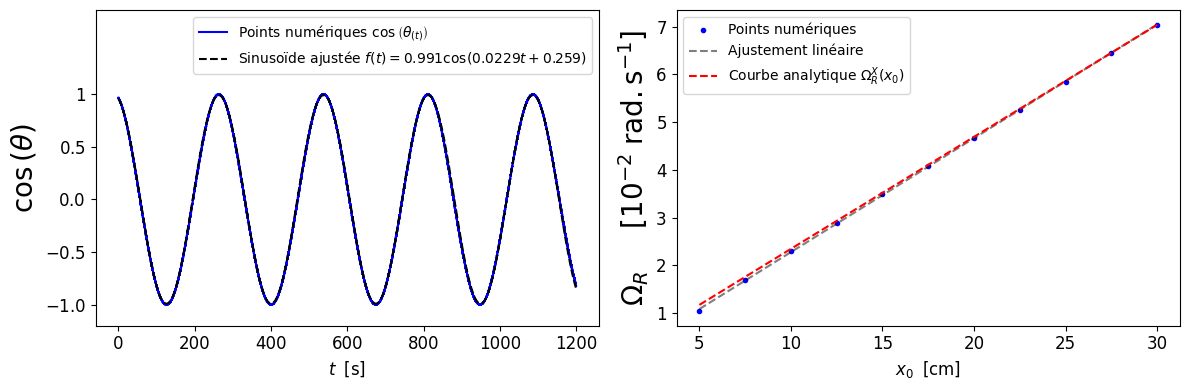

In [20]:
coeff_direct, ord_origine = np.polyfit(tab_x0, tab_Omega_R, 1)

tab_x_plot = np.linspace(tab_x0[0], tab_x0[-1], 1000, endpoint=True)

plt.figure(figsize=[12,4])


plt.subplot(1, 2, 1)
plt.plot(t, np.cos(the), 'b', label=r'Points numériques $\cos\left( \theta_{(t)} \right)$')
plt.plot(t, Sinusoide(t, *params_fit), 'k--', label=r'Sinusoïde ajustée $f(t) = 0.991 \cos(0.0229 t + 0.259)$')
plt.legend()
plt.ylim([-1.2, 1.8])
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel(r'$\cos\left( \theta \right)$', fontsize=20)
plt.yticks([-1, -0.5, 0, 0.5, 1], [r'$-1.0$', r'$-0.5$', r'$0.0$', r'$0.5$', r'$1$'], fontsize=12)





plt.subplot(1, 2, 2)

plt.xticks(fontsize=12)
plt.xlabel(r'$x_0 \; \; [\mathrm{cm}]$', fontsize=12)
plt.yticks(fontsize=12)

plt.scatter(tab_x0 * 1e2, tab_Omega_R * 1e2, marker='.', color='b', label='Points numériques')
plt.plot(tab_x_plot * 1e2, (coeff_direct *  tab_x_plot + ord_origine) * 1e2, 'k--', label='Ajustement linéaire', alpha=0.5)


plt.ylabel(r'$\Omega_R \quad \; \; \left[10^{-2} \; \mathrm{rad.s}^{-1} \right]  $', fontsize=20)

p_psi0 = p_psi_exp(params, CI)

tab_Omega_R_analytique = - 0.5 * np.cos(Phi) * m * h * tab_x_plot * (omega_L_th**2) / p_psi0




plt.plot(tab_x_plot * 1e2, tab_Omega_R_analytique * 1e2, 'r--', label='Courbe analytique $\Omega^X_R(x_0)$')

#plt.xlabel(r'$x_0 \; (\mathrm{cm})$')
#plt.ylabel(r'$\Omega_R \; (\mathrm{rad.s}^{-1})$')


plt.legend()


plt.tight_layout()

plt.savefig('Figures/MvtForce/RabiX.png')


plt.show()

$\;$

*In-fine*, on obtient bien la relation linéaire attendue dans le cas $\Phi = \pi$.

$\;$


##### III.3.b Influence du déphasage $\Phi$ :

Passsons maintenant à l'étude de l'influence du déphasage $\Phi$ sur la pulsation de Rabi à résonance. 


On prendra pour ce calcul $\; x_0 = 15 \; \mathrm{cm} \;$ et $\; \theta_{(t=0)} = \dfrac{\pi}{4}$ .

$\;$




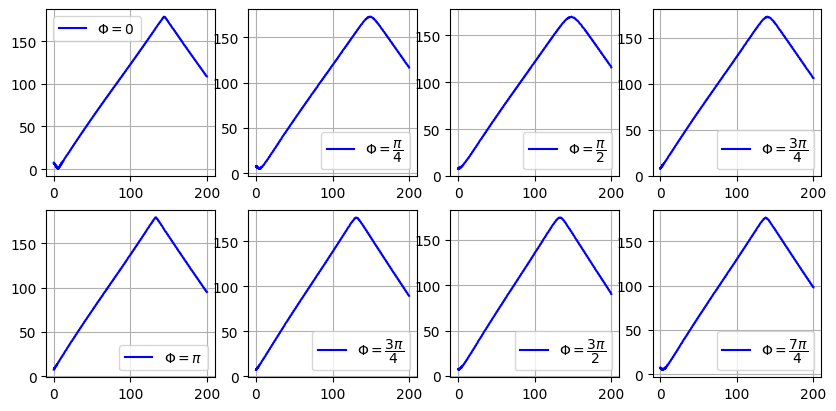

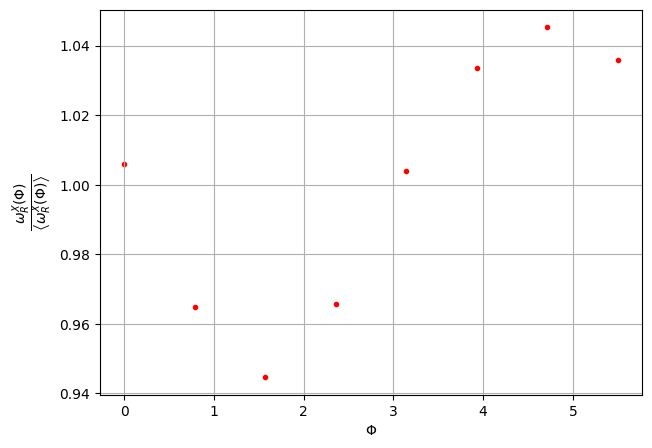

In [21]:
x0 =  0.1              # m
omega_exc = 1.663      # Hertz
Phi = 0

params = [g, m, h, J1, J3 , x0, Phi, omega_exc]
CI = [np.pi / 24, 0, 0, 0, 0, 2 * np.pi * 200]

tspan = (0., 200.)

tab_Phi = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi, 5 * np.pi / 4 ,3 * np.pi / 2, 7 * np.pi / 4]
list_label = [r'$\Phi = 0$', r'$\Phi = \dfrac{\pi}{4}$', r'$\Phi = \dfrac{\pi}{2}$', 
              r'$\Phi = \dfrac{3\pi}{4}$', r'$\Phi = \pi$', r'$\Phi = \dfrac{3\pi}{4}$', 
              r'$\Phi = \dfrac{3\pi}{2}$', r'$\Phi = \dfrac{7\pi}{4}$']


plt.figure(figsize=[10, 10])

new_omega_R = []

params_hint = [omega_R_th, 1, CI[0]]

for k in range(len(tab_Phi)):
    params[-2] = tab_Phi[k]
    t, the, _, _, _, _, _ = Gyro_Solver(tspan, CI, params, forcing='X', precision='LOW')
    plt.subplot(4, 4, k+1)
    plt.plot(t, the * 180 / np.pi, 'b', label=list_label[k])
    plt.grid()
    plt.legend()
    new_omega_R.append(Get_Rabi_Freq(t, the, params_hint, full_output='False')[0])
    #print('Cas', list_label[k], ' | Pulsation Rabi estimée :', np.round(new_omega_R[k], 4))

plt.show()

print("\n")

plt.figure(figsize=[7,5])
plt.scatter(tab_Phi, new_omega_R / np.mean(new_omega_R), marker='.', color='r')
plt.xlabel(r'$\Phi$')
plt.ylabel(r'$ \dfrac{\omega_R^X(\Phi)}{ \left < \omega_R^X(\Phi)  \right > } $')
plt.grid()
plt.show()




$\;$

**Remarques :**

* La pulsation Rabi ne varie pas en $\cos(\Phi)$, elle semble prendre une expression plus complexe de la forme :

$$ \Omega_R^X(\Phi) \approx \left[ 1 + f\left( \theta_{(t=0)} \right) \sin \left( \alpha \Phi + \beta \right)  \right] \cdot \Omega_R^0 $$


Où $f$, $\alpha$ et $\beta$ sont des fonctions de l'angle intial $\theta_{(t=0)}$. Il est remarquable que ces paramètres ne dépendent pas du régime de nutation. 

Par exemple dans le cas illustré ci-dessus, la fréquence de Rabi présente une fluctuation relative de l'ordre de $6\%$, en jouant sur $x_0$ on peut arriver à une fluctuation relative de $15\%$.


En jouant sur les paramètres, on constate que $f \to 0$ lorsque $\theta_{(t=0)} \to 0$ ce qui est la condition expérimentale. Ainsi si l'on lance le gyroscope depuis une position quasi-verticale, on pourra nous affranchir de cette complexité en ayant $\Omega_R^X(\Phi) \approx \mathrm{cste}$.

* L'amplitude maximale de la colatitude $\mathrm{\max}(\theta)$ dépend également du déphasage $\Phi$, cette amplitude est maximale pour $\Phi = 0  $ et $\Phi = \pi$.

* Les sens du mouvement (donné par le signe de $\Omega_R^X(t=0)$) dépend comme attentdu du signe de $\cos(\Phi)$, et avec le bonne convention de signe.

$\;$


$\;$ 


Tous ces éléments nous permettent de tirer quelques conclusions.

L'expression de la pulsation de Rabi que l'on a dérivé est strictement valable uniquement pour $\Phi = 0$ et $\Phi = \pi$, nous suggérons 2 principales causes :
 
1. La composante du moment de la pseudo-force d'entraînement selon $\vec{u}_\theta$ est (en partie) responsable de cet écart en modifiant la fréquence de Larmor, étant donnée que nous l'avons négligé pour déterminer la pulsation Rabi et qu'elle varie en valeur moyenne en $\sin(\omega t + \Phi - \varphi)$, un autre moyen de le voir est de visualiser sur une animation la direction et la norme du moment de la pseudo-force d'entrainement à résonance $\delta \to 0$ en prenant différentes valeurs de $\Phi$.


2. En faisant l'approximation gyroscopique nous avons négligé des termes certes très faibles (devant le terme considéré), mais dont la derivée temporelle est grande et qui donc devraient intervenir dans le théorème du moment cinétique. 


Tout compte fait, nous pouvons nous affranchir de toutes ces complications en **nous restreignants aux cas** $\Phi = 0$ et $\Phi = \pi$, et en lâchant le gyroscope depuis une position quasi-verticale à $t=0$. L'expression établie précédemment se réecrit donc :

$$ \boxed{ \; \Omega_R^X = -\dfrac{1}{2} \cdot sg\left[ \cos(\Phi) \right] \cdot \dfrac{mhx_0 \omega_L^2}{p_\psi} \; } $$


Où $sg$ est la fonction *signe*. Où de manière équivalente :


$$\boxed{ \; \vert \Omega_R^X \vert = \dfrac{1}{2} \cdot  \dfrac{mhx_0 \omega_L^2}{p_\psi} \; } $$


Satisfaire la condition $\Phi=0$ ou $\Phi$ est aisément réalisable expérimentalement en commandant le moteur qui entraîne le plateau.


On retiendra que lorsque $\Phi = 0$, **le gyroscope se dirigera vers le pôle Nord de la sphère de Bloch, et lorsque $\Phi=\pi$ il se dirigera vers le pôle Sud.**


$\;$


$\;$


En conclusion, dans les conditions expérimentales notre implémentation numérique est bien en accord avec nos résultats théoriques, le gyroscope décrira bien des **oscillations de Rabi de manière analogue à un spin $\frac{1}{2}$**.


$\;$


$\;$


### III.4 Termes de l'Hamiltonien :


L'Hamiltonien s'écrit dans le régime forcé :

$$ \mathcal{H}_X = \mathcal{H}_\text{libre} + E_{\text{ex}, X} =  \mathcal{H}_{\text{libre}} + m {\vec{a}^X_{\text{ent}}} \cdot \vec{r} $$


Où :
* $\mathcal{H}_\text{libre} = \mathcal{T}_\theta + \mathcal{T}_\psi + \mathcal{N} + mgh\cos(\theta) $ est l'Hamiltonien dans le régime libre.

* $ E_{\text{ex}, X} = mhx_0 \omega^2 \cos(\omega t + \Phi) \sin(\varphi) \sin(\theta) \;$ correspond à l'énergie potentielle due au forçage.

$\;$


Comparons les termes de l'Hamiltonien :

$\;$

In [22]:
x0 =  0.1         # m
Phi = np.pi

omega_L_th, omega_R_th = Compute_Carac_Pulsations(params, CI)

omega_exc = omega_L_th      # PULSATION DE LARMOR - Résonance

params = [g, m, h, J1, J3 , x0, Phi, omega_exc]
CI = [np.pi / 24, 0, 0, 0, 0, 2 * np.pi * 200]


tspan = (0., 1200.)

t, the, the_d, phi, phi_d, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='X', precision='HIGH')


p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

#Plot_Gyro_Angles(t, the, phi, psi)

#Plot_Gyro_Speed_Angles(t, the_d, phi_d, psi_d)

#Plot_Gyro_Momentum(t, p_the, p_phi, p_psi)


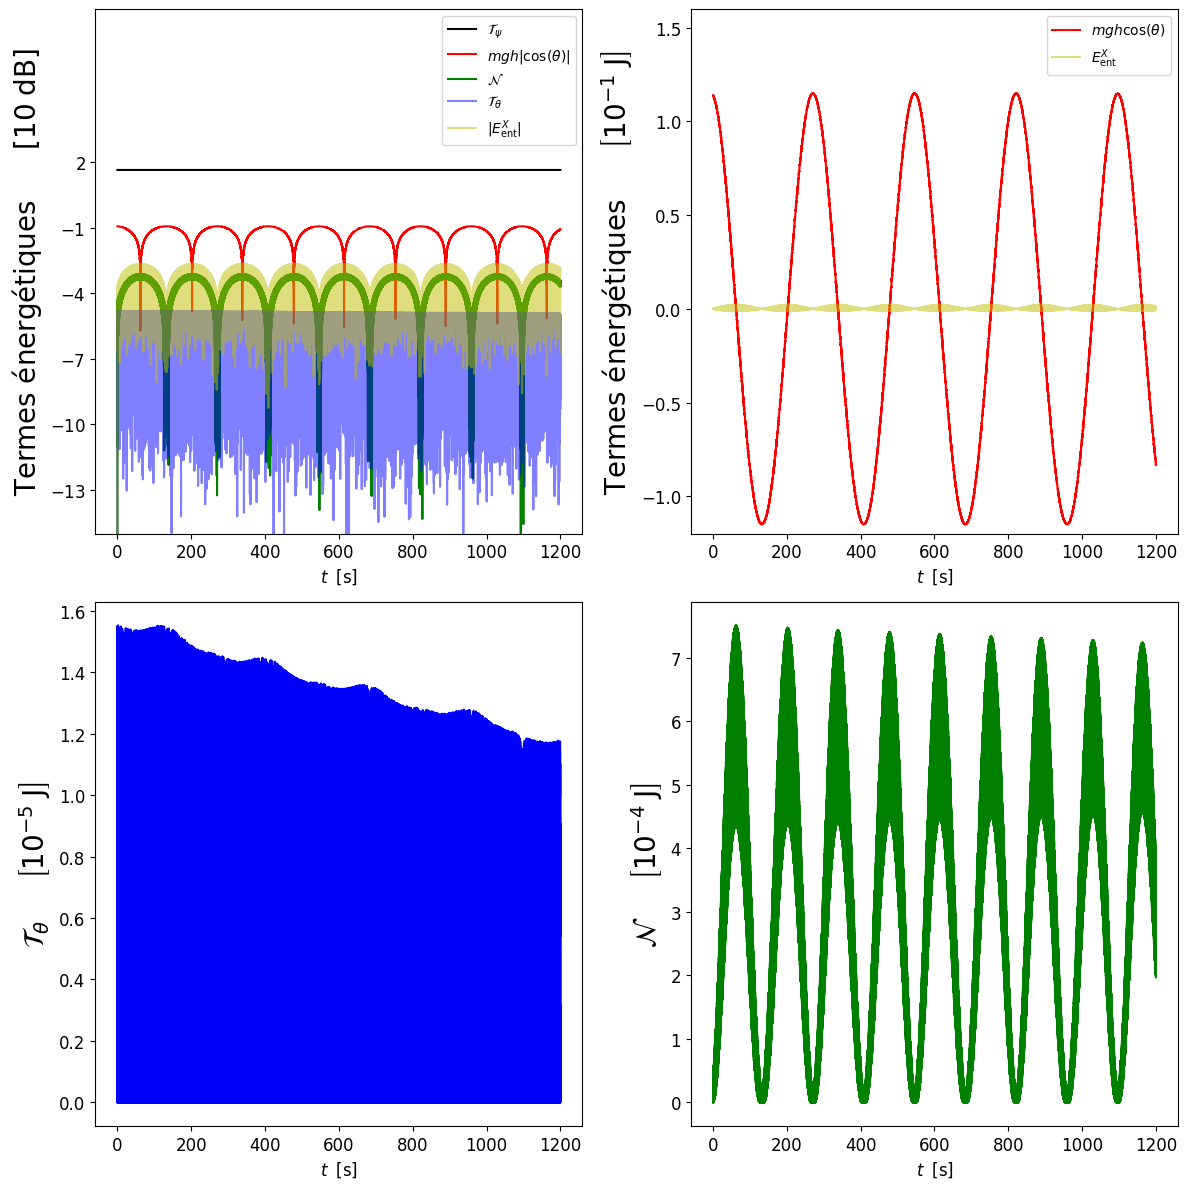

In [30]:
Ec_theta, Ec_psi, Nutation, Epp, E_ext = Hamiltonian_Terms(t, the, phi, psi, the_d, phi_d, psi_d, params, forcing='X')

E_tot = Ec_theta + Ec_psi + Nutation + Epp + E_ext

plt.figure(figsize=[12, 12])

plt.subplot(2, 2, 1)
plt.plot(t, Ec_psi, label=r'$ \mathcal{T}_\psi$', color='k')
plt.plot(t, np.abs(Epp), label=r'$ mgh \vert \cos(\theta) \vert$', color='r')
plt.plot(t, Nutation, label=r'$ \mathcal{N}$', color='g')
plt.plot(t, Ec_theta, label=r'$ \mathcal{T}_\theta$', color='b', alpha=0.5)
plt.plot(t, np.abs(E_ext), label=r'$\vert E^X_\text{ent} \vert $', color='y', alpha=0.5)

plt.yscale('log')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)

plt.yticks([1e2, 1e-1, 1e-4, 1e-7, 1e-10, 1e-13], 
           [r'$2$', r'$-1$', r'$-4$', r'$-7$', r'$-10$', r'$-13$'], fontsize=12)
plt.ylabel(r'Termes énergétiques $\quad \;\; \left [ 10 \; \mathrm{dB}\right]$', fontsize=20)
plt.xticks(fontsize=12)

plt.ylim([1e-15, 1e9])

plt.legend(loc='upper right')


plt.subplot(2, 2, 2)
plt.plot(t, Epp * 10, label=r'$ mgh\cos(\theta)$', color='r')
plt.plot(t, E_ext * 10, label=r'$ E^X_\text{ent}$', color='y', alpha=0.5)

plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)

plt.yticks(fontsize=12)
plt.ylabel(r'Termes énergétiques $\;\; \quad \left [ 10^{-1} \; \mathrm{J}\right]$', fontsize=20)
plt.xticks(fontsize=12)
plt.ylim([-1.2, 1.6])
plt.legend(loc='upper right')


plt.subplot(2, 2, 3)
plt.plot(t, Ec_theta * 1e5, label=r'$ \mathcal{T}_\theta$', color='b')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel(r'$ \mathcal{T}_\theta \;\; \quad \left [ 10^{-5} \; \mathrm{J}\right]$', fontsize=20)
plt.xticks(fontsize=12)




plt.subplot(2, 2, 4)
plt.plot(t, Nutation * 1e4, label=r'$ \mathcal{N}$', color='g')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel(r'$ \mathcal{N} \;\; \quad \left [ 10^{-4} \; \mathrm{J}\right]$', fontsize=20)
plt.xticks(fontsize=12)


plt.tight_layout()

plt.savefig('Figures/MvtForce/EnergiesForce.png')


plt.show()




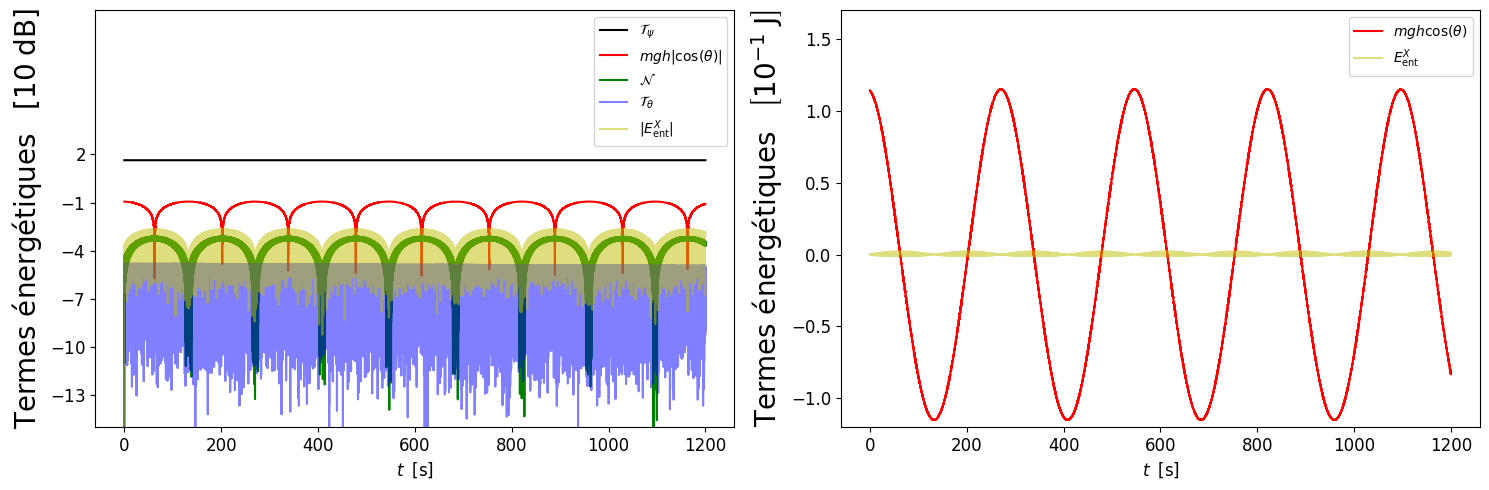

In [32]:
Ec_theta, Ec_psi, Nutation, Epp, E_ext = Hamiltonian_Terms(t, the, phi, psi, the_d, phi_d, psi_d, params, forcing='X')

E_tot = Ec_theta + Ec_psi + Nutation + Epp + E_ext

plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)
plt.plot(t, Ec_psi, label=r'$ \mathcal{T}_\psi$', color='k')
plt.plot(t, np.abs(Epp), label=r'$ mgh \vert \cos(\theta) \vert$', color='r')
plt.plot(t, Nutation, label=r'$ \mathcal{N}$', color='g')
plt.plot(t, Ec_theta, label=r'$ \mathcal{T}_\theta$', color='b', alpha=0.5)
plt.plot(t, np.abs(E_ext), label=r'$\vert E^X_\text{ent} \vert $', color='y', alpha=0.5)

plt.yscale('log')
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)

plt.yticks([1e2, 1e-1, 1e-4, 1e-7, 1e-10, 1e-13], 
           [r'$2$', r'$-1$', r'$-4$', r'$-7$', r'$-10$', r'$-13$'], fontsize=12)
plt.ylabel(r'Termes énergétiques $ \;\; \left [ 10 \; \mathrm{dB}\right]$', fontsize=20)
plt.xticks(fontsize=12)

plt.ylim([1e-15, 1e11])

plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.plot(t, Epp * 10, label=r'$ mgh\cos(\theta)$', color='r')
plt.plot(t, E_ext * 10, label=r'$ E^X_\text{ent}$', color='y', alpha=0.5)


plt.yticks(fontsize=12)
plt.ylabel(r'Termes énergétiques $\;\; \left [ 10^{-1} \; \mathrm{J}\right]$', fontsize=20)
plt.xticks(fontsize=12)
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)

plt.ylim([-1.2, 1.7])
plt.legend(loc='upper right')



plt.tight_layout()

plt.savefig('Figures/MvtForce/Energies2Seul.png')


plt.show()

### III.5 Moments des forces :




In [33]:
def Momentum_Fe(t, the, phi, psi, params, forcing='X'):
    '''Moment associé à la force centrifuge.'''
    _, m, h, _, _, x0, Phi, omega = params
    match forcing:
        case 'X':
            momentum_the = m*h*x0*(omega**2)*np.cos(omega*t+Phi)* np.sin(phi)*np.cos(the)
            momentum_phi = m*h*x0*(omega**2)*np.cos(omega*t+Phi)* np.cos(phi)*np.sin(the)
        case 'XY':
            momentum_the = - m*h*x0*(omega**2)*np.sin(omega*t+Phi-phi)*np.cos(the)
            momentum_phi = m*h*x0*(omega**2)*np.cos(omega*t+Phi-phi)*np.sin(the)

    return momentum_the, momentum_phi

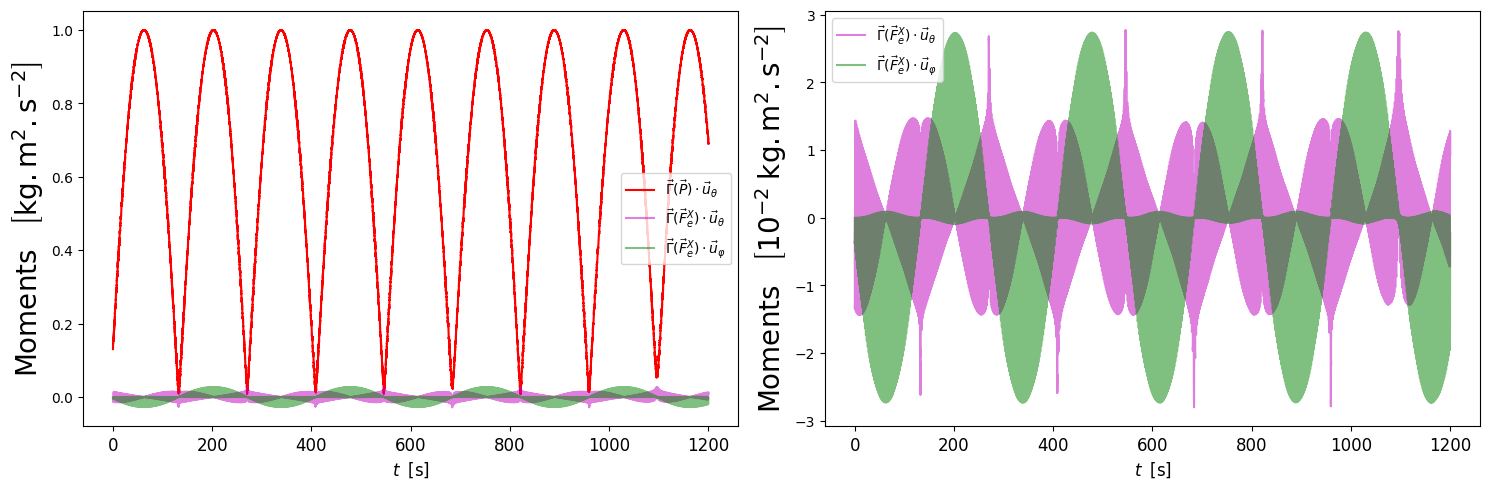

In [34]:
Gamma_P = Momentum_Weight(the, phi, psi, params)
Gamma_Fe_the, Gamma_Fe_phi = Momentum_Fe(t, the, phi, psi, params, forcing='X')

coeff_norm = m*g*h

plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)
plt.ylabel(r'Moments $\; \; \left[\mathrm{kg.m^2.s}^{-2}  \right]$', fontsize=20)
plt.plot(t, Gamma_P / coeff_norm, label=r'$\vec{\Gamma}(\vec{P}) \cdot \vec{u}_\theta$', color='r')
plt.plot(t, Gamma_Fe_the / coeff_norm, label=r'$\vec{\Gamma}(\vec{F}^X_e) \cdot \vec{u}_\theta$', alpha=0.5, color='m')
plt.plot(t, Gamma_Fe_phi / coeff_norm, label=r'$\vec{\Gamma}(\vec{F}^X_e) \cdot \vec{u}_\varphi$', alpha=0.5, color='g')
plt.legend()
plt.xticks(fontsize=12)
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)

plt.subplot(1, 2, 2)
plt.ylabel(r'Moments $\; \; \left[10^{-2} \; \mathrm{kg.m^2.s}^{-2}  \right]$', fontsize=20)

plt.plot(t, 1e2 * Gamma_Fe_the / coeff_norm, label=r'$\vec{\Gamma}(\vec{F}^X_e) \cdot \vec{u}_\theta$', alpha=0.5, color='m')
plt.plot(t, 1e2 * Gamma_Fe_phi / coeff_norm, label=r'$\vec{\Gamma}(\vec{F}^X_e) \cdot \vec{u}_\varphi$', alpha=0.5, color='g')
plt.legend()
plt.xticks(fontsize=12)
plt.xlabel(r'$t \; \; [\mathrm{s}]$', fontsize=12)

plt.tight_layout()

plt.savefig('Figures/MvtForce/MomentsForces.png')

plt.show()


In [47]:
J1_ = J1 + m*(h**2)
print((4 * np.sqrt(J1_ * m *g *h) / omega_L_th)**(-1))

59.757550009547714


In [ ]:
prin

$\;$

Il est remarquable que :


$$  \vert \vec{\Gamma}(\vec{F}^X_e) \vert \ll \vert \vec{\Gamma}(\vec{P}) \vert \qquad \forall t $$


Ainsi, on déduit que **la correction du terme $\vec{\Gamma}(\vec{F}^X_e) \cdot \vec{u}_\theta$ à l'expression de la pulsation de Larmor est négligeable**.

$\;$

Toutefois, on peux s'efforcer d'essayer de caractériser l'effet de cette composante de moment sur la précession. Comme il fut détaillé dans la rapport, en projettant le théorème du moment cinétique selon $\vec{u}_\theta$ puis en moyennant les expressions sur un temps $\tau$ tel que $ \dfrac{2\pi}{\Omega_R^X} \ll T \ll \dfrac{2\pi}{\Omega_L}\;$, on estime à grand renforts de développements limités une *correction* de l'expression de la pulsation de Larmor :


$$ \Omega^{\text{corr}}_L (\delta) = \Omega_L + \delta \mathrm{sinc} \left(\delta \cdot t  \right) $$

Où $\Omega_L = \frac{mgh}{p_\psi}$ est la pulsation de Larmor non corrigée. 

Nous testerons la pertinence de cette expression plus loin, nous nous contenterons de remarquer qu'elle ne modifie pas l'expression de Rabi à résonance ($\delta = 0$ donc $\Omega^{X, \text{corr}}_R = \Omega^X_R$). Étant donné la différence d'ordre de grandeur, les développements limités utilisés pour arriver à cette expression sont en parie justifiés.


$\;$

$\;$


### III.6 *Rotating-frame* et Oscillations de Rabi quantiques  :

$\;$


Cf discussion avec Matthieu, bp ça ne fait pas le tour.



$\;$


$\;$



In [27]:
m*g*h

0.1149609375

In [28]:
m * h * 0.1 * (1.663**2)

0.003240901171875001

# VI- Probabilités de mesure et Chevrons de Rabi :



$\;$


Nous avons démontré l'analogie entre le gyroscope et les particules de spin $\frac{1}{2}$ en ayant établi une correspondance directe via la précession de Larmor et les oscillations de Rabi. 

Il reste à poser l'équivalent classique d'une quantité fondamentale : les probabilités de mesure dans les états propres $\ket{0}$ et $\ket{1}$ aux instants $t$ notées $\mathbb{P}\left(\ket{0}, t \right)$ et $\mathbb{P}\left (\ket{1}, t \right)$.

Étant donné que notre analogie se fonde sur le fait que le gyroscope représente un spin $\frac{1}{2}$ dans la sphère de Bloch, on déduit directement l'équivalence :

$$ \mathbb{P}\left (\ket{1}, t \right) = \dfrac{1 + \cos(\theta)}{2} \qquad \qquad \; \qquad \qquad  \mathbb{P}\left (\ket{1}, t \right) = \dfrac{1 - \cos(\theta)}{2} $$



$\;$


Jusqu'à présent, nous nous sommes restreints à exciter le gyroscope à sa fréquence propre de Larmor. Nous allons désormais nous éloigner de la résonance $(\delta \to 0)$ en excitant le système à des *detunings* non nuls $(\delta \ne 0, \; \omega \ne \Omega_L)$ et pendant des durées différentes $\Delta t$. Et ce, dans le but de *cartographiant* la probabilité de mesurer "notre Qubit" dans l'état *up* $\mathbb{P}\left(\ket{0} \right)$ en fonction de *la fréquence $\omega$ et de la durée $\Delta t$ du Drive* (excitation).


$\;$


On prendra des durées allant jusqu'à $\Delta t_\text{max} = 2000\mathrm{s}$ soit environ $530$ périodes de précession et $8$ périodes de Nutation.

On prendre également des pulsations $\omega \in \left[ \dfrac{4}{5} \Omega_L \; ; \; \dfrac{6}{5} \Omega_L   \right]$  


$\;$



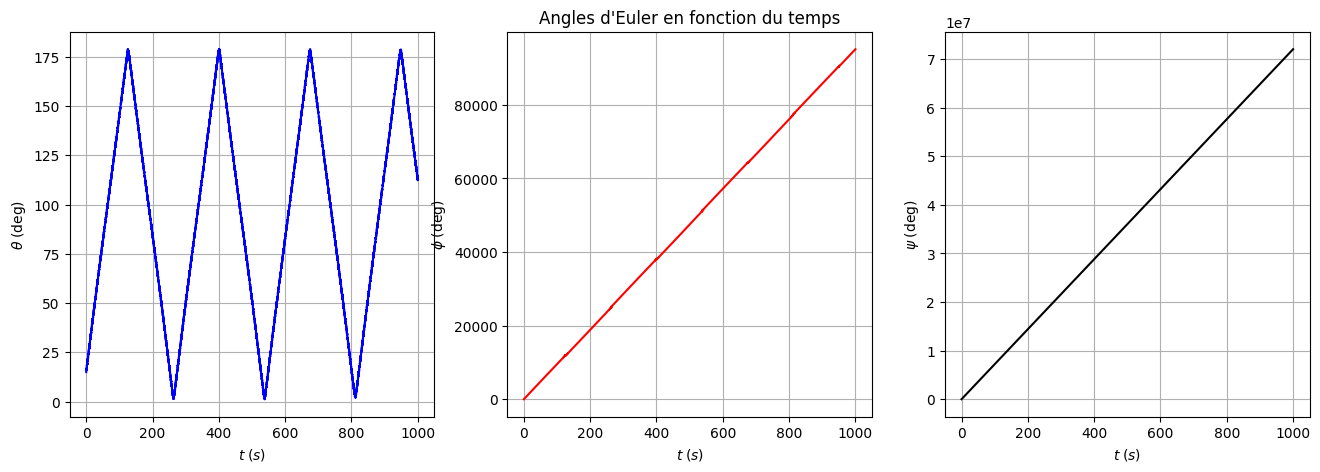

In [50]:
g = 9.81           # m/s^2
m = 0.375          # kg
J3 = 0.000055      # kg.m^2
J1 = 0.000055      # kg.m^2
h = 31.25 * 1e-3   # m
x0 =  0.1         # m
Phi = np.pi

omega_L_th, omega_R_th = Compute_Carac_Pulsations(params, CI)

omega_exc = omega_L_th      # PULSATION DE LARMOR - Résonance

params = [g, m, h, J1, J3 , x0, Phi, omega_exc]
CI = [np.pi / 12, 0, 0, 0, 0, 2 * np.pi * 200]

tspan = (0., 1000.)

t, the, the_d, phi, phi_d, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='X', precision='HIGH')

p_the, p_phi, p_psi = Conjugated_Momentums(the, phi, psi, the_d, phi_d, psi_d, params)

Plot_Gyro_Angles(t, the, phi, psi)

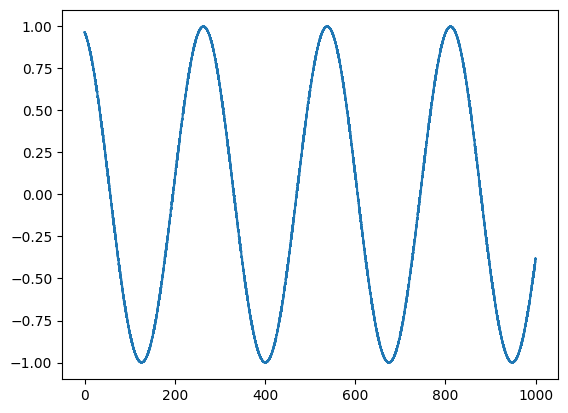

In [51]:
plt.plot(t, np.cos(the))

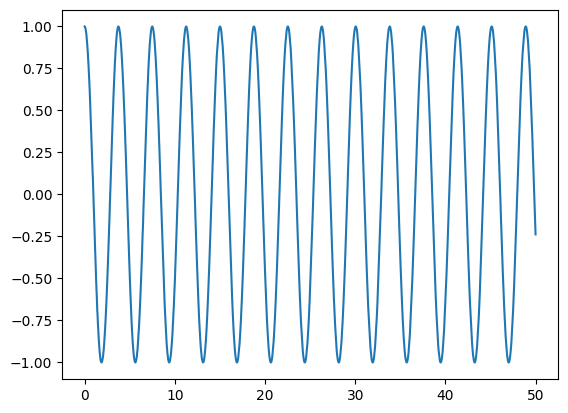

In [54]:
plt.plot(t[t <= 50], np.cos(phi[t <= 50]))

In [29]:
N_points = 51    ### Nombre de points / résolution de la figure

# Tableau des pulsations d'excitation
tab_omega = np.linspace(0.97 * omega_L_th, 1.03 * omega_L_th, N_points, endpoint=True)

tab_delta = tab_omega - omega_L_th   # tableau des detunnings

# Tableau des durées d'excitation
tab_t_burst = np.linspace(0, 500, N_points)

In [30]:
def Rabi_Chevron(tab_exc_pulsation, tab_t_burst,  params, CI, forcing='X', precision='LOW'):
    
    list_the = []
    list_t = []
    tab_theta = np.zeros( (len(tab_exc_pulsation), len(tab_t_burst)) )

    for i in range(len(tab_exc_pulsation)):
        
        params[-1] = tab_exc_pulsation[i]
        
        for j in range(len(tab_t_burst)):
            tspan = (0, tab_t_burst[j])
            t, the, _, _, _, _, _ = Gyro_Solver(tspan, CI, params, forcing=forcing, precision=precision)
            tab_theta[i, j] = the[-1]
            list_the.append(the)
            list_t.append(t)

            
    
    return tab_theta, list_the, list_t
tab_theta, list_the, list_t = Rabi_Chevron(tab_omega, tab_t_burst,  params, CI, forcing='X', precision='LOW')





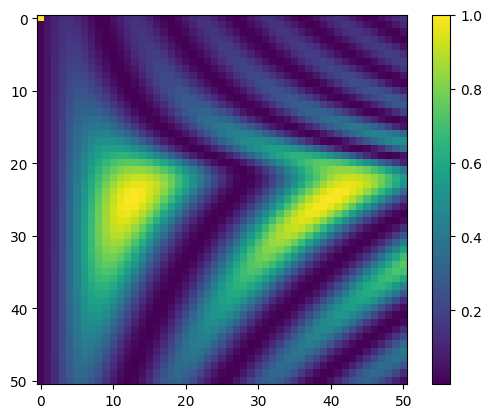

In [31]:
Rabi_num = (1 - np.cos(tab_theta)) / 2

Rabi_num[0, 0] = 1

plt.figure()
plt.imshow( Rabi_num ) 
plt.colorbar()
plt.show()

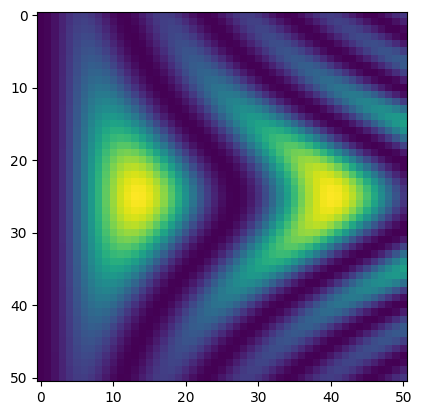

In [32]:
Rabi_IDEAL = Rabi_Ideal(tab_t_burst, tab_delta, omega_R_th)
plt.imshow(Rabi_IDEAL)

In [33]:
def Rabi_Freq_Modified(delta, Omega_R, Omega_L):
    return Omega_R * (1 + delta / Omega_L)**2

def Larmor_Freq_Modified(delta, t_burst, Omega_L):
    return Omega_L + delta * np.sinc(delta * t_burst / np.pi)

def Rabi_Assym(t_burst, delta, Omega_R, Omega_L):
    '''Chevrons de Rabi assymétriques.'''
    tab_Rabi_th = np.zeros((len(delta), len(t_burst)))
    for i in range(len(delta)):
        for j in range(len(t_burst)):
            #Omega_L_mod = Larmor_Freq_Modified(delta[i], t_burst[j], Omega_L)
            #Omega_R_mod = Rabi_Freq_Modified(delta[i], Omega_R, Omega_L)
            Omega_R_mod = Omega_R * np.sinc( delta[i] * t_burst[j] / np.pi )
            pulsation =  np.sqrt(delta[i]**2 + Omega_R_mod**2) / 2
            num = (Omega_R_mod**2) * (np.sin( pulsation * t_burst[j] )**2)
            den = Omega_R_mod**2 + delta[i]**2
            tab_Rabi_th[i, j] = num / den
    
    return tab_Rabi_th

Rabi_MOD = Rabi_Assym(tab_t_burst, tab_delta, omega_R_th, omega_L_th)


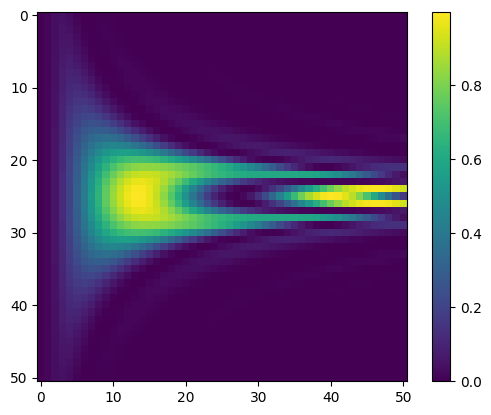

In [34]:
plt.imshow(Rabi_MOD)
plt.colorbar()

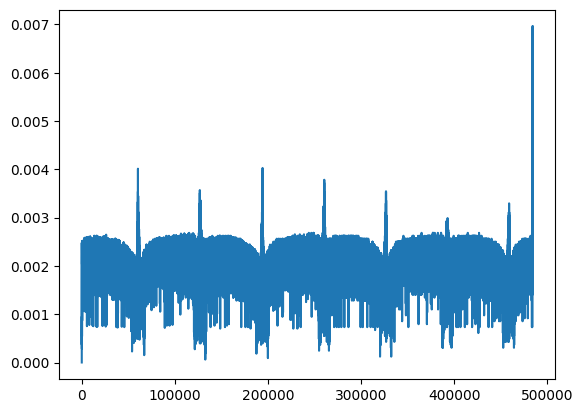

In [35]:
plt.plot(t[1:] - t[:-1])

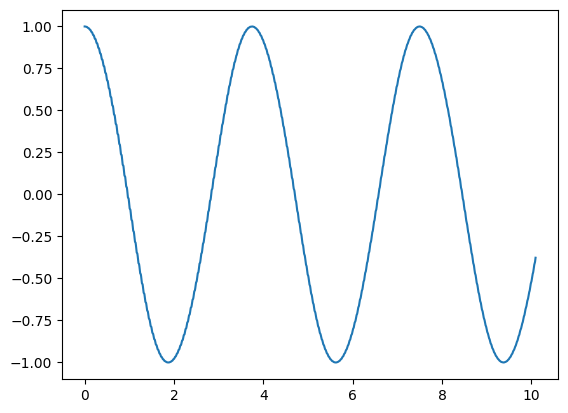

In [36]:
plt.plot(t[:5000], np.cos(phi[:5000]))

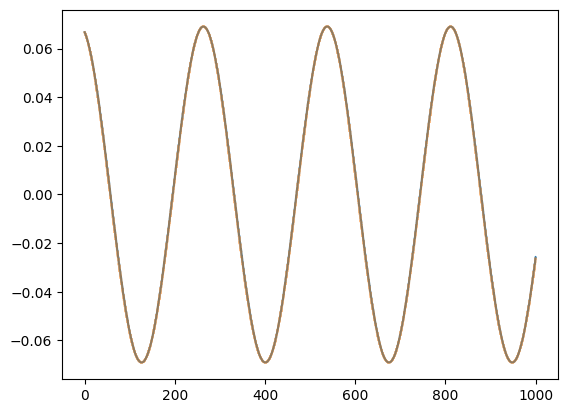

In [37]:
plt.plot(t, p_phi)
plt.plot(t, np.cos(the) * p_psi, alpha=0.5)

# VII- Conclusion :


In [38]:
J1 + m*(h**2)

0.0004212109375

In [39]:
np.mean( p_psi**2 / (m * g * h))

0.041552592

In [40]:
np.mean(p_psi)

0.06911531

In [41]:
np.sqrt(2 * m*g*h * (J1 + m*(h**2)))

0.009841016640597038

In [42]:
np.mean(p_psi) / np.sqrt(2 * m*g*h * (J1 + m*(h**2)))

7.023188094433583